In [130]:
from polyase import *
import pandas as pd
import polars as pl 
import RNApysoforms as RNApy

# Running Polyase on tetraploid potato sample 

## Required Files

Files necessary for this tutorial are deposited on Zenodo ([DOI link here]()):

- **Syntelog finder output**: To assign genes based on syntelogous relationships
- **Oarfish directory**: Contains transcript quantification data
- **GFF file (liftoff annotation)**: Genome annotation from liftoff
- **GFF file (novel transcripts)**: Novel identified transcripts
- **Functional gene annotation**: Gene functional annotations

## Installation of polyase 


You can install polyase using pip:
```bash
pip install -i https://test.pypi.org/simple/ polyase==0.1.7
```


## 1) Reading in the data 

In this section we will read in the data genespace output file, transcript quanitfication directory, tx2gene. 

In [131]:
out_dir_syntelogfinder = "/scratch/nadjafn/potato-allelic-orthogroups/output_atlantic_liftoff"
out_dir_long_read_quant = "/scratch/nadjafn/nf-core-plantlongrnaseq/output_atlantic_liftoff"

In [132]:
# File with syntelog categories from SyntelogFinder
var_obs_file = f"{out_dir_syntelogfinder}/genespace/unitato2Atl.no_scaffold.no_hap0_genespace_categories.tsv"
# Directory of gene counts from oarfish generated by long-read quantification pipeline
gene_counts_dir = f"{out_dir_long_read_quant}/oarfish/"
tx2gene = f"{out_dir_long_read_quant}/custom/combined.tx2gene.tsv"

## Dataset Information

**Source**: [Citation/DOI from the paper]

**Organism**: *Solanum tuberosum* cv. Atlantic (tetraploid)

**Experimental Design**:
- **10 samples** total from cultivar Atlantic
- **2 tissues**: Leaf and tuber
- **Biological replicates**: 5 samples per tissue type
- **Sequencing**: Long-read RNA-seq (ONT)
- **Quantification**: Oarfish transcript-level counts

**Sample Information**:

| Sample ID    | Tissue | Description |
|--------------|--------|-------------|
| SRR14993892  | Leaf   | Replicate 1 |
| SRR14993893  | Leaf   | Replicate 2 |
| SRR14993894  | Leaf   | Replicate 3 |
| SRR14993895  | Leaf   | Replicate 4 |
| SRR14996168  | Leaf   | Replicate 5 |
| SRR14995031  | Tuber  | Replicate 1 |
| SRR14995032  | Tuber  | Replicate 2 |
| SRR14995033  | Tuber  | Replicate 3 |
| SRR14995034  | Tuber  | Replicate 4 |
| SRR14995933  | Tuber  | Replicate 5 |

In [133]:
# Define sample IDs and their conditions
sample_info = {
    "SRR14993892": "leaf",
    "SRR14993893": "leaf",
    "SRR14993894": "leaf",
    "SRR14993895": "leaf",
    "SRR14996168": "leaf",
    "SRR14995031": "tuber",
    "SRR14995032": "tuber",
    "SRR14995033": "tuber",
    "SRR14995034": "tuber",
    "SRR14995933": "tuber"
} 

# With isoforms
allelic_data = load_ase_data(
    var_obs_file=var_obs_file,
    sample_info=sample_info,
    tx_to_gene_file=tx2gene,
    isoform_counts_dir=gene_counts_dir,
    quant_dir=gene_counts_dir
)

Loading metadata files...
Loading counts for 10 samples in parallel...
Oarfish quant.sf format detected
Oarfish quant.sf format detected
Oarfish quant.sf format detected
Oarfish quant.sf format detected
Oarfish quant.sf format detected
Oarfish quant.sf format detected
Oarfish quant.sf format detected
Oarfish quant.sf format detected
Oarfish quant.sf format detected
Oarfish quant.sf format detected
Successfully loaded 10 out of 10 samples
Concatenating count matrices...
Creating isoform metadata...
Adding var_obs annotations for 250224 transcripts...
Found 167997 genes with var_obs annotations
Found 33730 genes without var_obs annotations (will be filled with NaN)
Assigning Synt_id values...
Assigned Synt_id values for 33730 genes (41291 transcripts)
Keeping all 250224 transcripts from expression data
Statistics:
  - Total transcripts: 250224
  - Transcripts with gene_id annotation: 250224
  - Transcripts with var_obs data: 208933
  - Transcripts with NaN var_obs data: 41291
  - Transcr

In [134]:
allelic_data.var.head()

transcript_id  \
Soltu.DM.04G012980.1.Hap1  Soltu.DM.04G012980.1.Hap1   
Soltu.DM.01G009200.3.Hap3  Soltu.DM.01G009200.1.Hap3   
PGSC0003DMT400054929.Hap1  PGSC0003DMT400054929.Hap1   
Soltu.DM.12G002340.1.Hap4  Soltu.DM.12G002340.1.Hap4   
Sotub09g028470.1.1.Hap0                         None   

                                             gene_id feature_type  \
Soltu.DM.04G012980.1.Hap1    Soltu.DM.04G012980.Hap1   transcript   
Soltu.DM.01G009200.3.Hap3    Soltu.DM.01G009200.Hap3   transcript   
PGSC0003DMT400054929.Hap1  PGSC0003DMG400021314.Hap1   transcript   
Soltu.DM.12G002340.1.Hap4    Soltu.DM.12G002340.Hap4   transcript   
Sotub09g028470.1.1.Hap0          Sotub09g028470.Hap0   transcript   

                                 Synt_id              synteny_category  \
Soltu.DM.04G012980.1.Hap1  Synt_id_31807  1hap1_1hap2_1hap3_0hap4_no_s   
Soltu.DM.01G009200.3.Hap3  Synt_id_31344  1hap1_1hap2_1hap3_1hap4_no_s   
PGSC0003DMT400054929.Hap1  Synt_id_53868     1hap1_0hap2_1hap3_1hap4_s   
Soltu.DM.12G002340.1.Hap4  Synt_id_59836     1hap1_0hap2_1hap3_1hap4_s   
Sotub09g028470.1.1.Hap0                1                          None   

                                                              syntenic_genes  \
Soltu.DM.04G012980.1.Hap1  Soltu.DM.04G012980.1.Hap1,Soltu.DM.04G012980.1...   
Soltu.DM.01G009200.3.Hap3  Soltu.DM.05G006230.1.Hap1,Soltu.DM.05G006230.1...   
PGSC0003DMT400054929.Hap1  PGSC0003DMT400054929.Hap1,nan,PGSC0003DMT40005...   
Soltu.DM.12G002340.1.Hap4  Soltu.DM.12G002340.1.Hap1,nan,Soltu.DM.12G0023...   
Sotub09g028470.1.1.Hap0                                                 None   

                          haplotype CDS_length_category  \
Soltu.DM.04G012980.1.Hap1      hap1                 NaN   
Soltu.DM.01G009200.3.Hap3      hap3                 NaN   
PGSC0003DMT400054929.Hap1      hap1                 NaN   
Soltu.DM.12G002340.1.Hap4      hap4                 NaN   
Sotub09g028470.1.1.Hap0        None                None   

                          CDS_haplotype_with_longest_annotation  
Soltu.DM.04G012980.1.Hap1                                   NaN  
Soltu.DM.01G009200.3.Hap3                                   NaN  
PGSC0003DMT400054929.Hap1                                   NaN  
Soltu.DM.12G002340.1.Hap4                                   NaN  
Sotub09g028470.1.1.Hap0                                    None

In [135]:
allelic_data.obs.head()

condition  em_lib_size  unique_lib_size  ambig_lib_size  \
SRR14993894      leaf    6524167.0          3596141         8846994   
SRR14993895      leaf    3207895.0          1914658         3787858   
SRR14993893      leaf     711674.0           409917          905189   
SRR14993892      leaf    1314624.0           791265         1518961   
SRR14995033     tuber    3108348.0          2088492         2699295   

             total_lib_size  
SRR14993894        12443135  
SRR14993895         5702516  
SRR14993893         1315106  
SRR14993892         2310226  
SRR14995033         4787787

### Add annotation

For interpretation of results we add functional gene annotations from an additional file to the adata.var

In [136]:
# Load functional annotation data
annotation_file = "/scratch/nadjafn/reference/ADAPT_liftoff/Phureja_v4-v6.1_translations.xlsx"
df_annotation = pd.read_excel(annotation_file)
df_annotation = df_annotation.iloc[:, 1:3]
df_annotation.columns = ['gene_id_unitato', 'functional_annotation']

# Remove version suffix from gene IDs (e.g., "GENE.1" -> "GENE")
allelic_data.var['gene_id_unitato'] = allelic_data.var['gene_id'].str.rsplit('.', n=1).str[0]
allelic_data.var['original_index'] = allelic_data.var.index

# Merge annotations
merged_data = pd.merge(
    allelic_data.var,
    df_annotation,
    on='gene_id_unitato',
    how='left'
)

# Remove duplicates and restore index
merged_data = merged_data.drop_duplicates(subset=['original_index', 'gene_id'], keep='first')
merged_data.index = merged_data['original_index']
merged_data = merged_data.drop(columns=['original_index'])

# Update AnnData object
allelic_data.var = merged_data


Let's verify whether Bambu detected any previously unannotated transcripts in our dataset.

In [137]:
allelic_data.var[allelic_data.var_names.str.startswith("Bambu")].head()

transcript_id                  gene_id  \
original_index                                                       
BambuTx3481_1   Soltu.DM.09G031800.1.Hap1  Soltu.DM.09G031800.Hap1   
BambuTx6208_2                        None  Soltu.DM.04G020620.Hap0   
BambuTx5988                          None            BambuGene1079   
BambuTx7417_11    Sotub11g018860.1.1.Hap4      Sotub11g018860.Hap4   
BambuTx5373_1   Soltu.DM.01G035720.1.Hap2  Soltu.DM.01G035720.Hap2   

               feature_type        Synt_id              synteny_category  \
original_index                                                             
BambuTx3481_1    transcript  Synt_id_53654     1hap1_1hap2_1hap3_1hap4_s   
BambuTx6208_2    transcript              5                          None   
BambuTx5988      transcript              6                          None   
BambuTx7417_11   transcript    Synt_id_832  1hap1_1hap2_0hap3_1hap4_no_s   
BambuTx5373_1    transcript  Synt_id_13839     1hap1_1hap2_0hap3_1hap4_s   

                                                   syntenic_genes haplotype  \
original_index                                                                
BambuTx3481_1   Soltu.DM.09G031800.1.Hap1,Soltu.DM.09G031800.1...      hap1   
BambuTx6208_2                                                None      None   
BambuTx5988                                                  None      None   
BambuTx7417_11  Sotub11g018860.1.1.Hap1,Sotub11g018860.1.1.Hap...      hap4   
BambuTx5373_1   Soltu.DM.01G035720.1.Hap1,Soltu.DM.01G035720.1...      hap2   

               CDS_length_category CDS_haplotype_with_longest_annotation  \
original_index                                                             
BambuTx3481_1   less_1%_difference                         equal_lengths   
BambuTx6208_2                 None                                  None   
BambuTx5988                   None                                  None   
BambuTx7417_11                 NaN                                   NaN   
BambuTx5373_1                  NaN                                   NaN   

                   gene_id_unitato                      functional_annotation  
original_index                                                                 
BambuTx3481_1   Soltu.DM.09G031800         Ubiquitin-like superfamily protein  
BambuTx6208_2   Soltu.DM.04G020620  hypothetical protein/hypothetical protein  
BambuTx5988          BambuGene1079                                        NaN  
BambuTx7417_11      Sotub11g018860                                        NaN  
BambuTx5373_1   Soltu.DM.01G035720       Protein of unknown function (DUF810)

In [138]:
# print specific gene info
allelic_data.var[allelic_data.var['gene_id'].str.contains("Soltu.DM.11G023050")]

transcript_id                  gene_id  \
original_index                                                                  
BambuTx3983_2              Soltu.DM.11G023050.1.Hap2  Soltu.DM.11G023050.Hap2   
BambuTx4008_2              Soltu.DM.11G023050.1.Hap3  Soltu.DM.11G023050.Hap3   
Soltu.DM.11G023050.1.Hap3  Soltu.DM.11G023050.1.Hap3  Soltu.DM.11G023050.Hap3   
Soltu.DM.11G023050.1.Hap1  Soltu.DM.11G023050.1.Hap1  Soltu.DM.11G023050.Hap1   
BambuTx3983_1              Soltu.DM.11G023050.1.Hap3  Soltu.DM.11G023050.Hap3   
BambuTx3983                Soltu.DM.11G023050.1.Hap1  Soltu.DM.11G023050.Hap1   
BambuTx4008_3              Soltu.DM.11G023050.1.Hap4  Soltu.DM.11G023050.Hap4   
Soltu.DM.11G023050.1.Hap4  Soltu.DM.11G023050.1.Hap4  Soltu.DM.11G023050.Hap4   
BambuTx4008_1              Soltu.DM.11G023050.1.Hap1  Soltu.DM.11G023050.Hap1   
Soltu.DM.11G023050.1.Hap2  Soltu.DM.11G023050.1.Hap2  Soltu.DM.11G023050.Hap2   
BambuTx3983_4              Soltu.DM.11G023050.1.Hap4  Soltu.DM.11G023050.Hap4   

                          feature_type        Synt_id  \
original_index                                          
BambuTx3983_2               transcript  Synt_id_59067   
BambuTx4008_2               transcript  Synt_id_59067   
Soltu.DM.11G023050.1.Hap3   transcript  Synt_id_59067   
Soltu.DM.11G023050.1.Hap1   transcript  Synt_id_59067   
BambuTx3983_1               transcript  Synt_id_59067   
BambuTx3983                 transcript  Synt_id_59067   
BambuTx4008_3               transcript  Synt_id_59067   
Soltu.DM.11G023050.1.Hap4   transcript  Synt_id_59067   
BambuTx4008_1               transcript  Synt_id_59067   
Soltu.DM.11G023050.1.Hap2   transcript  Synt_id_59067   
BambuTx3983_4               transcript  Synt_id_59067   

                                    synteny_category  \
original_index                                         
BambuTx3983_2              1hap1_1hap2_1hap3_1hap4_s   
BambuTx4008_2              1hap1_1hap2_1hap3_1hap4_s   
Soltu.DM.11G023050.1.Hap3  1hap1_1hap2_1hap3_1hap4_s   
Soltu.DM.11G023050.1.Hap1  1hap1_1hap2_1hap3_1hap4_s   
BambuTx3983_1              1hap1_1hap2_1hap3_1hap4_s   
BambuTx3983                1hap1_1hap2_1hap3_1hap4_s   
BambuTx4008_3              1hap1_1hap2_1hap3_1hap4_s   
Soltu.DM.11G023050.1.Hap4  1hap1_1hap2_1hap3_1hap4_s   
BambuTx4008_1              1hap1_1hap2_1hap3_1hap4_s   
Soltu.DM.11G023050.1.Hap2  1hap1_1hap2_1hap3_1hap4_s   
BambuTx3983_4              1hap1_1hap2_1hap3_1hap4_s   

                                                              syntenic_genes  \
original_index                                                                 
BambuTx3983_2              Soltu.DM.11G023050.1.Hap1,Soltu.DM.11G023050.1...   
BambuTx4008_2              Soltu.DM.11G023050.1.Hap1,Soltu.DM.11G023050.1...   
Soltu.DM.11G023050.1.Hap3  Soltu.DM.11G023050.1.Hap1,Soltu.DM.11G023050.1...   
Soltu.DM.11G023050.1.Hap1  Soltu.DM.11G023050.1.Hap1,Soltu.DM.11G023050.1...   
BambuTx3983_1              Soltu.DM.11G023050.1.Hap1,Soltu.DM.11G023050.1...   
BambuTx3983                Soltu.DM.11G023050.1.Hap1,Soltu.DM.11G023050.1...   
BambuTx4008_3              Soltu.DM.11G023050.1.Hap1,Soltu.DM.11G023050.1...   
Soltu.DM.11G023050.1.Hap4  Soltu.DM.11G023050.1.Hap1,Soltu.DM.11G023050.1...   
BambuTx4008_1              Soltu.DM.11G023050.1.Hap1,Soltu.DM.11G023050.1...   
Soltu.DM.11G023050.1.Hap2  Soltu.DM.11G023050.1.Hap1,Soltu.DM.11G023050.1...   
BambuTx3983_4              Soltu.DM.11G023050.1.Hap1,Soltu.DM.11G023050.1...   

                          haplotype CDS_length_category  \
original_index                                            
BambuTx3983_2                  hap2  less_1%_difference   
BambuTx4008_2                  hap3  less_1%_difference   
Soltu.DM.11G023050.1.Hap3      hap3  less_1%_difference   
Soltu.DM.11G023050.1.Hap1      hap1  less_1%_difference   
BambuTx3983_1                  hap3  less_1%_difference   
BambuTx3983                    hap1  less_1%_difference   
B

Now we will aggregate transcript-level counts to gene-level counts for allele-specific expression analysis. Unique counts are just summed. For ambgious counts we take the mean, under the asseumption that multimapping between transcripts of the same gene to other genes is similar.

In [139]:
# Usage
adata_gene = aggregate_transcripts_to_genes(allelic_data)

# Check the result
print(adata_gene)


Aggregating 250224 transcripts to 201727 genes
Created gene-level AnnData: 10 × 201727
Average transcripts per gene: 1.24
AnnData object with n_obs × n_vars = 10 × 201727
    obs: 'condition', 'em_lib_size', 'unique_lib_size', 'ambig_lib_size', 'total_lib_size'
    var: 'gene_id', 'feature_type', 'transcript_id', 'Synt_id', 'synteny_category', 'syntenic_genes', 'haplotype', 'CDS_length_category', 'CDS_haplotype_with_longest_annotation', 'functional_annotation', 'n_transcripts'
    layers: 'unique_counts', 'ambiguous_counts', 'em_counts', 'em_cpm', 'unique_cpm', 'ambiguous_cpm'


## 2) Gene-level analysis

### Filter low expressed genes

In [140]:
#CPM threshold (automatically normalized)
adata_gene_filtered = filter_low_expressed_genes(
    adata_gene,
    min_expression=20.0,  # 20 count per million
    lib_size_normalization='cpm',
    mode= 'all',
    library_size_dependent=True,
    verbose=True)

Using library-size adjusted thresholds:
  SRR14993894: 71.92
  SRR14993895: 38.29
  SRR14993893: 8.20
  SRR14993892: 15.83
  SRR14995033: 41.77
  ... and 5 more
Filtered out 88670 groups
Kept 3665 / 201727 items


### Calculate allelic ratios and multimapping ratios

In [141]:
allelic_data_filtered = calculate_allelic_ratios(adata_gene_filtered , 'unique_counts')
allelic_data_filtered = calculate_allelic_ratios(adata_gene_filtered , 'em_counts')
allelic_data_filtered = calculate_multi_ratios(adata_gene_filtered, 'unique_counts', 'ambiguous_counts')

In [142]:
allelic_data_filtered

AnnData object with n_obs × n_vars = 10 × 3665
    obs: 'condition', 'em_lib_size', 'unique_lib_size', 'ambig_lib_size', 'total_lib_size', 'lib_size'
    var: 'gene_id', 'feature_type', 'transcript_id', 'Synt_id', 'synteny_category', 'syntenic_genes', 'haplotype', 'CDS_length_category', 'CDS_haplotype_with_longest_annotation', 'functional_annotation', 'n_transcripts', 'multimapping_ratio'
    layers: 'unique_counts', 'ambiguous_counts', 'em_counts', 'em_cpm', 'unique_cpm', 'ambiguous_cpm', 'allelic_ratio_unique_counts', 'allelic_ratio_em_counts'

### Plotting of allelic ratios for quality control

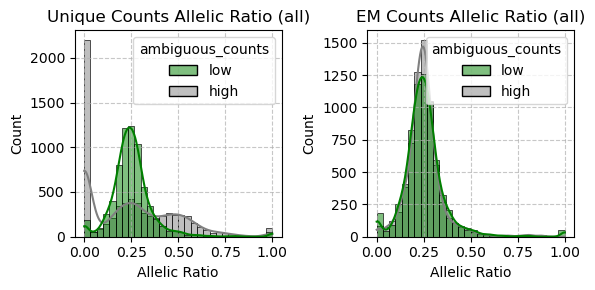

In [143]:
fig = plot_allelic_ratios(
    allelic_data_filtered,
    synteny_category="1hap1_1hap2_1hap3_1hap4_s", 
    sample='all', 
    ratio_type="both",
    figsize = (6,3),
    kde = True,
    multimapping_threshold=0.25,
    #save_path="allelic_ratios.svg"
)


Most genes exhibit balanced allelic expression, with ratios clustering around 0.25. Some genes display extreme ratios, which may represent biologically meaningful patterns or annotation artifacts. Applying a multimapping filter reduces noise from genes with high ambiguous read counts. We will exclude genes showing length differences, as these can introduce bias into the results.

In [144]:
high_bias = allelic_data_filtered [:,(allelic_data_filtered.var['multimapping_ratio'] < 0.25) & (allelic_data_filtered  .layers['allelic_ratio_unique_counts'] > 0.8).all(axis=0) & (allelic_data_filtered .var["synteny_category"] == "1hap1_1hap2_1hap3_1hap4_s") ]

high_bias.var

gene_id feature_type  \
Soltu.DM.05G025890.Hap3  Soltu.DM.05G025890.Hap3         gene   
Soltu.DM.04G000950.Hap4  Soltu.DM.04G000950.Hap4         gene   
Sotub01g012860.Hap2          Sotub01g012860.Hap2         gene   
Soltu.DM.06G028650.Hap4  Soltu.DM.06G028650.Hap4         gene   
Soltu.DM.06G032940.Hap4  Soltu.DM.06G032940.Hap4         gene   

                                     transcript_id        Synt_id  \
Soltu.DM.05G025890.Hap3  Soltu.DM.05G025890.1.Hap3  Synt_id_35710   
Soltu.DM.04G000950.Hap4  Soltu.DM.04G000950.1.Hap4  Synt_id_26660   
Sotub01g012860.Hap2        Sotub01g012860.1.1.Hap2  Synt_id_11456   
Soltu.DM.06G028650.Hap4  Soltu.DM.06G028650.1.Hap4  Synt_id_39549   
Soltu.DM.06G032940.Hap4  Soltu.DM.06G032940.1.Hap4  Synt_id_40092   

                                  synteny_category  \
Soltu.DM.05G025890.Hap3  1hap1_1hap2_1hap3_1hap4_s   
Soltu.DM.04G000950.Hap4  1hap1_1hap2_1hap3_1hap4_s   
Sotub01g012860.Hap2      1hap1_1hap2_1hap3_1hap4_s   
Soltu.DM.06G028650.Hap4  1hap1_1hap2_1hap3_1hap4_s   
Soltu.DM.06G032940.Hap4  1hap1_1hap2_1hap3_1hap4_s   

                                                            syntenic_genes  \
Soltu.DM.05G025890.Hap3  Soltu.DM.05G025890.1.Hap1,Soltu.DM.05G025890.1...   
Soltu.DM.04G000950.Hap4  Soltu.DM.04G000950.1.Hap1,Soltu.DM.04G000950.1...   
Sotub01g012860.Hap2      Sotub01g012860.1.1.Hap1,Sotub01g012860.1.1.Hap...   
Soltu.DM.06G028650.Hap4  Soltu.DM.06G028650.1.Hap1,Soltu.DM.06G028650.1...   
Soltu.DM.06G032940.Hap4  Soltu.DM.06G032940.1.Hap1,Soltu.DM.06G032940.1...   

                        haplotype  CDS_length_category  \
Soltu.DM.05G025890.Hap3      hap3  more_20%_difference   
Soltu.DM.04G000950.Hap4      hap4  more_20%_difference   
Sotub01g012860.Hap2          hap2  more_20%_difference   
Soltu.DM.06G028650.Hap4      hap4  more_20%_difference   
Soltu.DM.06G032940.Hap4      hap4  more_20%_difference   

                        CDS_haplotype_with_longest_annotation  \
Soltu.DM.05G025890.Hap3                                    4G   
Soltu.DM.04G000950.Hap4                                    4G   
Sotub01g012860.Hap2                                        2G   
Soltu.DM.06G028650.Hap4                                    4G   
Soltu.DM.06G032940.Hap4                                    4G   

                                              functional_annotation  \
Soltu.DM.05G025890.Hap3                     homolog of anti-oxidant   
Soltu.DM.04G000950.Hap4                        Ribosomal protein S4   
Sotub01g012860.Hap2                                            None   
Soltu.DM.06G028650.Hap4               Ribosomal L27e protein family   
Soltu.DM.06G032940.Hap4  Ribosomal protein L16p/L10e family protein   

                         n_transcripts  multimapping_ratio  
Soltu.DM.05G025890.Hap3              2            0.004286  
Soltu.DM.04G000950.Hap4              1            0.210949  
Sotub01g012860.Hap2                  1            0.000514  
Soltu.DM.06G028650.Hap4              1            0.025207  
Soltu.DM.06G032940.Hap4              1            0.248933

You can see that alleles with high expression ratios (>0.8) have big length differences. 

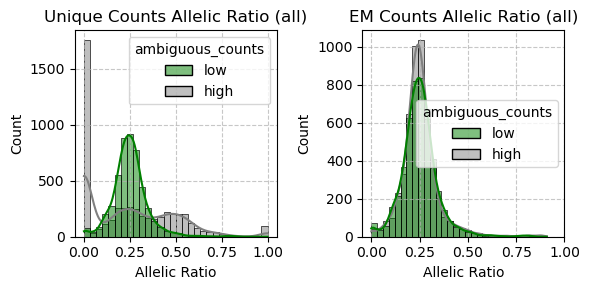

In [145]:
# filter transcripts that are not equal lengths
mask = allelic_data_filtered.var["CDS_haplotype_with_longest_annotation"] == "equal_lengths"
allelic_data_length_filtered = allelic_data_filtered[:,mask].copy()
fig = plot_allelic_ratios(
    allelic_data_length_filtered,
    synteny_category="1hap1_1hap2_1hap3_1hap4_s", 
    sample='all', 
    ratio_type="both",
    figsize = (6,3),
    kde = True,
    multimapping_threshold=0.25,
    #save_path="allelic_ratios.svg"
)


After filtering for alleles of equal length, several of the highly biased genes are removed.

Another potential source of bias arises from unequal transcript numbers per gene. For example, a novel transcript may have been identified on only one haplotype. Therefore, we will filter to include only genes where all alleles have the same number of transcripts.

Genes with different transcript numbers across alleles: 167
Genes with equal transcript numbers across alleles: 971


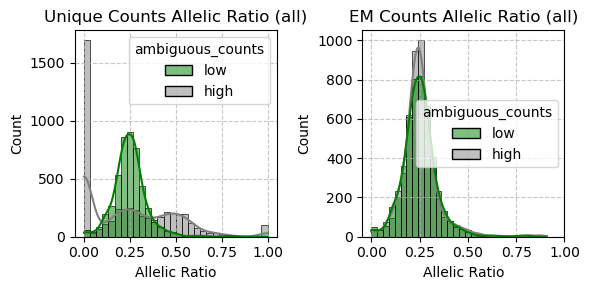

In [146]:
# Group by syntelog ID and check for equal transcript numbers across alleles
synt_ids_same_tx_number = allelic_data_filtered.var.groupby('Synt_id').aggregate({
    'n_transcripts': set
})

# Count genes with different transcript numbers before filtering
genes_diff_tx_number = synt_ids_same_tx_number[synt_ids_same_tx_number['n_transcripts'].apply(lambda x: len(x) > 1)]
print(f"Genes with different transcript numbers across alleles: {len(genes_diff_tx_number)}")

# Keep only syntelogs where all alleles have the same number of transcripts
synt_ids_same_tx_number = synt_ids_same_tx_number[synt_ids_same_tx_number['n_transcripts'].apply(lambda x: len(x) == 1)]
print(f"Genes with equal transcript numbers across alleles: {len(synt_ids_same_tx_number)}")

# Filter for equal-length transcripts with equal transcript numbers
mask = (allelic_data_filtered.var["CDS_haplotype_with_longest_annotation"] == "equal_lengths") & \
       (allelic_data_filtered.var['Synt_id'].isin(synt_ids_same_tx_number.index))



allelic_data_length_filtered = allelic_data_filtered[:, mask].copy()

# Plot allelic ratios after filtering
fig = plot_allelic_ratios(
    allelic_data_length_filtered,
    synteny_category="1hap1_1hap2_1hap3_1hap4_s",
    sample='all',
    ratio_type="both",
    figsize=(6, 3),
    kde=True,
    multimapping_threshold=0.25,
    #save_path="allelic_ratios.svg"
)

Looks much better to what we had before filtering 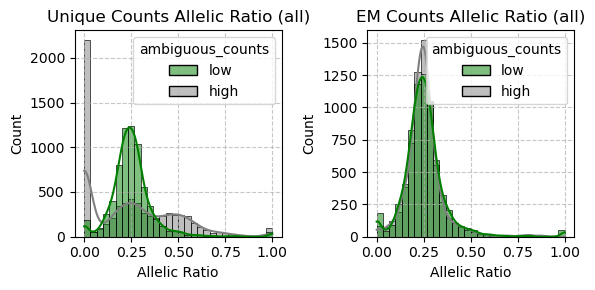

#### Get ASE results for cis for control

Using CPM data from layer: unique_cpm
Processing syntelog 100/119
Found 32 from 119 syntelogs with at least one significantly different allele (FDR < 0.005 and ratio difference > 0.1)


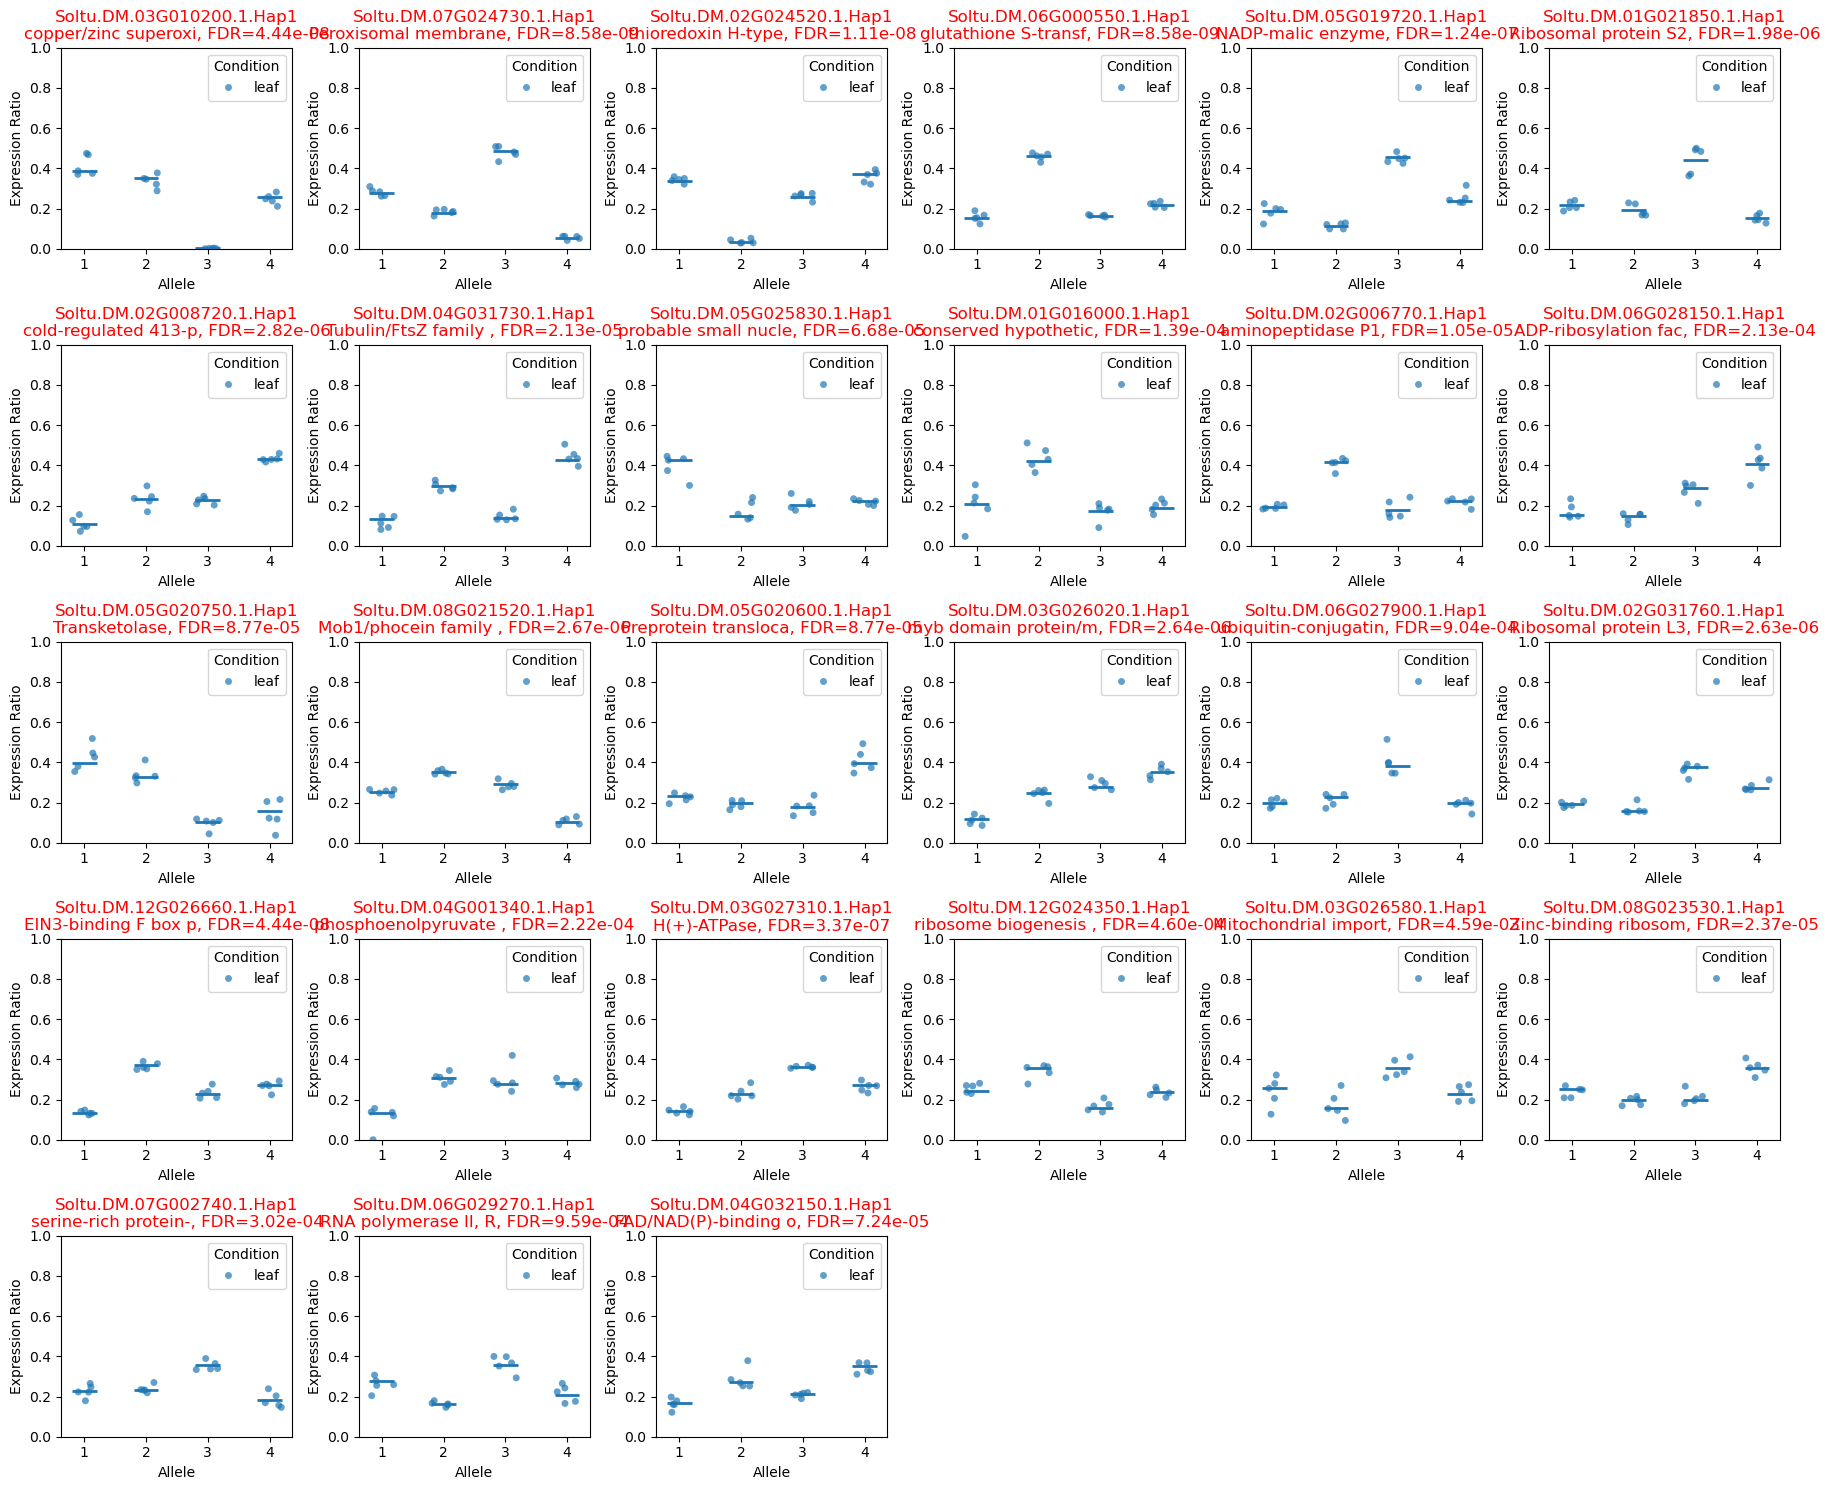

In [147]:
# select only the genes with equal lengths, low multimapping ratio and synteny category "1hap1_1hap2_1hap3_1hap4_s"
mask = (allelic_data_filtered.var["multimapping_ratio"] < 0.25) & (allelic_data_filtered.var["synteny_category"] == "1hap1_1hap2_1hap3_1hap4_s") & (allelic_data_filtered.var["CDS_haplotype_with_longest_annotation"] == "equal_lengths") & (allelic_data_filtered.var['Synt_id'].isin(synt_ids_same_tx_number.index))
allelic_data_length_filter = allelic_data_filtered[:,mask].copy()

# 1. Test for differential allelic ratios withing conditions
cis_results_control = test_allelic_ratios_within_conditions(allelic_data_length_filter, layer="unique_counts", test_condition= "leaf", inplace=True)

# Get the synt_ids with high bias and filter
#potential_high_bias_synt_ids = cis_results_control.sort_values(by='ratio_difference', ascending=False)['Synt_id'].head(7)
# exclude these from the cis_results
cis_results_filtered = cis_results_control[~cis_results_control['Synt_id'].isin(potential_high_bias_synt_ids)].copy()

# 2. Get top differential syntelogs
cis_top_results = get_top_differential_syntelogs(cis_results_filtered, n=45, sort_by='ratio_difference', fdr_threshold=0.05, ratio_threshold=0.1)

# 3. Plot the results
fig = plot_top_differential_syntelogs(cis_top_results, n = 50, figsize = (3*6, 5*3),sort_by='ratio_difference')
#cis_results_control.to_csv('/scratch/nadjafn/LR_DESIREE_PAPER/ANALYSIS/ASE_results/long_cis_results_control.tsv', sep='\t')


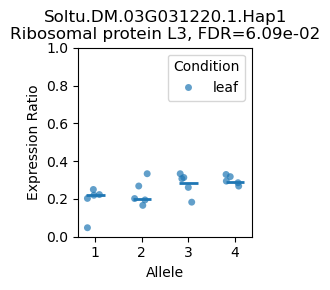

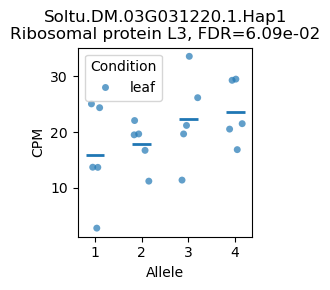

In [17]:
Synt_id = "Soltu.DM.03G031220"
import matplotlib.pyplot as plt
# plot next to each other

# filter results for specific synt id
cis_results_filtered_synt = cis_results_control[cis_results_control['transcript_id'].str.contains(Synt_id)]
ax1 = plot_top_differential_syntelogs(cis_results_filtered_synt, n = 20, figsize = (12, 3),sort_by='ratio_difference')
ax1.savefig(f"/scratch/nadjafn/LR_DESIREE_PAPER/ANALYSIS/final_plots/ATL_cis_{Synt_id}_ratio.svg" )
# filter results for specific synt id
cis_results_filtered_synt = cis_results_control[cis_results_control['transcript_id'].str.contains(Synt_id)]
ax2 = plot_top_differential_syntelogs(cis_results_filtered_synt, n = 20, figsize = (12, 3*1),sort_by='ratio_difference', plot_type='cpm' )
ax2.savefig(f"/scratch/nadjafn/LR_DESIREE_PAPER/ANALYSIS/final_plots/ATL_cis_{Synt_id}_cpm.svg" )

In [18]:
# # for transcript id split the hap and ./d.
# cis_results_control['transcript_id'] = cis_results_control['transcript_id'].apply(lambda x: x.rsplit('.', 2)[0] if isinstance(x, str) else x)
# cis_results_control.to_csv('/scratch/nadjafn/LR_DESIREE_PAPER/ANALYSIS/ASE_results/Atlantic_cis_results_control.tsv', sep='\t')

In [19]:
# plot shared gene between atlantic and desiree
Synt_id = "Synt_id_14709"
import matplotlib.pyplot as plt
# plot next to each other

# filter results for specific synt id
cis_results_filtered_synt = cis_results_control[cis_results_control['Synt_id'] == Synt_id]
ax1 = plot_top_differential_syntelogs(cis_results_filtered_synt, n = 20, figsize = (3*6, 3*1),sort_by='ratio_difference', )

# filter results for specific synt id
cis_results_filtered_synt = cis_results_control[cis_results_control['Synt_id'] == Synt_id]
ax2 = plot_top_differential_syntelogs(cis_results_filtered_synt, n = 20, figsize = (3*6, 3*1),sort_by='ratio_difference', plot_type='cpm' )

No results to plot
No results to plot


In [20]:
cis_top_results.sort_values(by='ratio_difference', ascending=False).head(10)

Synt_id allele                              functional_annotation  \
101  Synt_id_22638      3                   copper/zinc superoxide dismutase   
354  Synt_id_44380      3  Peroxisomal membrane 22 kDa (Mpv17/PMP22) fami...   
411  Synt_id_55638      2                                 thioredoxin H-type   
257  Synt_id_35878      2                      glutathione S-transferase phi   
222  Synt_id_34828      3                                  NADP-malic enzyme   
353  Synt_id_44380      4  Peroxisomal membrane 22 kDa (Mpv17/PMP22) fami...   
7    Synt_id_12347      3                             Ribosomal protein S21e   
46   Synt_id_17607      4                 cold-regulated 413-plasma membrane   
185  Synt_id_29709      4                        Tubulin/FtsZ family protein   
251  Synt_id_35702      1         probable small nuclear ribonucleoprotein G   

                 transcript_id       p_value  ratio_difference  n_alleles  \
101  Soltu.DM.03G010200.1.Hap3  1.120853e-09          0.248870          4   
354  Soltu.DM.07G024730.1.Hap3  1.286642e-09          0.234884          4   
411  Soltu.DM.02G024520.1.Hap2  2.092727e-10          0.218152          4   
257  Soltu.DM.06G000550.1.Hap2  7.113937e-11          0.213626          4   
222  Soltu.DM.05G019720.1.Hap3  4.952483e-09          0.206039          4   
353  Soltu.DM.07G024730.1.Hap4  6.288085e-11          0.197278          4   
7    Soltu.DM.01G021850.1.Hap3  1.084015e-07          0.189839          4   
46   Soltu.DM.02G008720.1.Hap4  1.958227e-07          0.182651          4   
185  Soltu.DM.04G031730.1.Hap4  1.699378e-06          0.177461          4   
251  Soltu.DM.05G025830.1.Hap1  7.296832e-06          0.177343          4   

     ratios_leaf_mean                                    ratios_rep_leaf  \
101          0.001467      [0.0, 0.0, 0.0034602076124567475, 0.002, 0.0]   
354          0.485177  [0.4330935251798561, 0.46905537459283386, 0.48...   
411          0.031865  [0.04424778761061947, 0.05223880597014925, 0.0...   
257          0.463390  [0.470679012345679, 0.4297994269340974, 0.4617...   
222          0.456265  [0.4246913580246914, 0.43315508021390375, 0.44...   
353          0.053016  [0.0618705035971223, 0.06188925081433225, 0.06...   
7            0.440106  [0.49209932279909707, 0.5, 0.4839188520534389,...   
46           0.433212  [0.4295774647887324, 0.42857142857142855, 0.45...   
185          0.427974  [0.5050505050505051, 0.45454545454545453, 0.43...   
251          0.426869  [0.37383177570093457, 0.3, 0.4329501915708812,...   

     cpm_leaf_mean                                       cpm_rep_leaf  \
101       0.093001  [0.0, 0.0, 0.31173090141666077, 0.153276272664...   
354     245.362751  [228.96280609512684, 202.33983537406178, 235.6...   
411       6.500582  [7.606737744024146, 9.835964219572448, 4.98769...   
257     224.919578  [232.0055011927365, 210.77066184798105, 220.08...   
222     137.547875  [130.83588919721532, 113.81615739790975, 125.3...   
353      28.021179  [32.70897229930383, 26.69761716741093, 29.9261...   
7       287.004637  [331.6537656394528, 363.93067612418054, 304.87...   
46       44.980814  [46.4011002385473, 50.584958843515444, 51.7473...   
185      33.556234  [38.033688720120736, 28.10275491306414, 31.484...   
251      35.043433  [30.426950976096585, 21.077066184798102, 35.22...   

              FDR  
101  4.439579e-08  
354  4.439579e-08  
411  1.106820e-08  
257  8.580474e-09  
222  1.240727e-07  
353  8.580474e-09  
7    1.984582e-06  
46   2.824594e-06  
185  2.128694e-05  
251  6.679408e-05

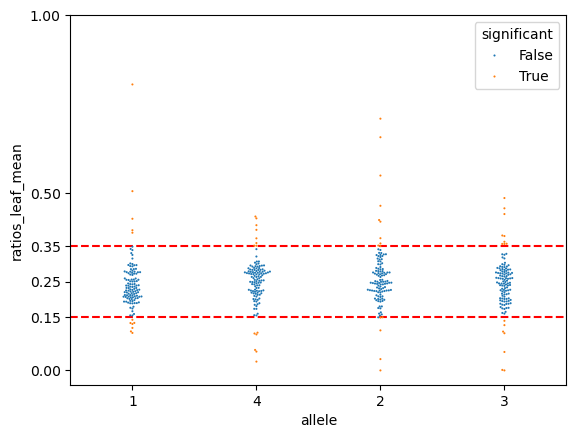

In [21]:
cis_results_control
cis_results_control['significant'] = (cis_results_control['p_value'] < 0.05) & (cis_results_control['ratio_difference'] > 0.1)

import matplotlib.pyplot as plt
import seaborn as sns
sns.swarmplot(y = cis_results_control['ratios_leaf_mean'], x = cis_results_control['allele'],  hue=cis_results_control['significant'], size=1.5 )
plt.yticks([0.0, 0.15, 0.25, 0.35, 0.5, 1.0])

# add a line at y = 0.35 and y = 0.15
plt.axhline(y=0.35, color='r', linestyle='--')
plt.axhline(y=0.15, color='r', linestyle='--')

### And cis for heat

In [22]:
# # select only the genes with equal lengths, low multimapping ratio and synteny category "1hap1_1hap2_1hap3_1hap4_s"
# mask = (allelic_data_filtered.var["multimapping_ratio"] < 0.25) & (allelic_data_filtered.var["synteny_category"] == "1hap1_1hap2_1hap3_1hap4_s") & (allelic_data_filtered.var["CDS_haplotype_with_longest_annotation"] == "equal_lengths") & (allelic_data_filtered.var['Synt_id'].isin(synt_ids_same_tx_number.index))
# allelic_data_length_filter = allelic_data_filtered[:,mask].copy()

# # 1. Test for differential allelic ratios withing conditions
# cis_results_heat = test_allelic_ratios_within_conditions(allelic_data_length_filter, layer="unique_counts", test_condition= "heat", inplace=True)

# # Get the synt_ids with high bias and filter
# potential_high_bias_synt_ids = cis_results_heat.sort_values(by='ratio_difference', ascending=False)['Synt_id'].head(7)
# # exclude these from the cis_results
# cis_results_filtered = cis_results_heat[~cis_results_heat['Synt_id'].isin(potential_high_bias_synt_ids)].copy()

# # 2. Get top differential syntelogs
# cis_top_results = get_top_differential_syntelogs(cis_results_filtered, n=20, sort_by='ratio_difference', fdr_threshold=0.05, ratio_threshold=0.1)

# # 3. Plot the results
# fig = plot_top_differential_syntelogs(cis_top_results, n = 20, figsize = (3*6, 3*3),sort_by='ratio_difference')

### Plot CPMs

In [23]:
grouped_results= cis_results_control.groupby('Synt_id').agg({
    'FDR': 'min',
    'ratio_difference': 'max' , # Assuming this is the correct column name
    'transcript_id': 'first'  # Concatenate transcript IDs
        })
# split the last prefix from transcript_id
grouped_results['gene_id'] = grouped_results['transcript_id'].apply(lambda x: x.rsplit('.', 1)[0] if isinstance(x, str) else x)
    # Print summary
significant_results = grouped_results[(grouped_results['FDR'] < 0.05) & (grouped_results['ratio_difference'] > 0.1)]

unsignificant_results = grouped_results[(grouped_results['FDR'] >= 0.05) | (grouped_results['ratio_difference'] <= 0.1)]

# save only the gene_Id column to a tsv
#significant_results[['gene_id']].to_csv('unbalanced_syntelogs.tsv', sep='\t', index=False)

#grouped_results[['gene_id']].to_csv('all_syntelogs.tsv', sep='\t', index=False)

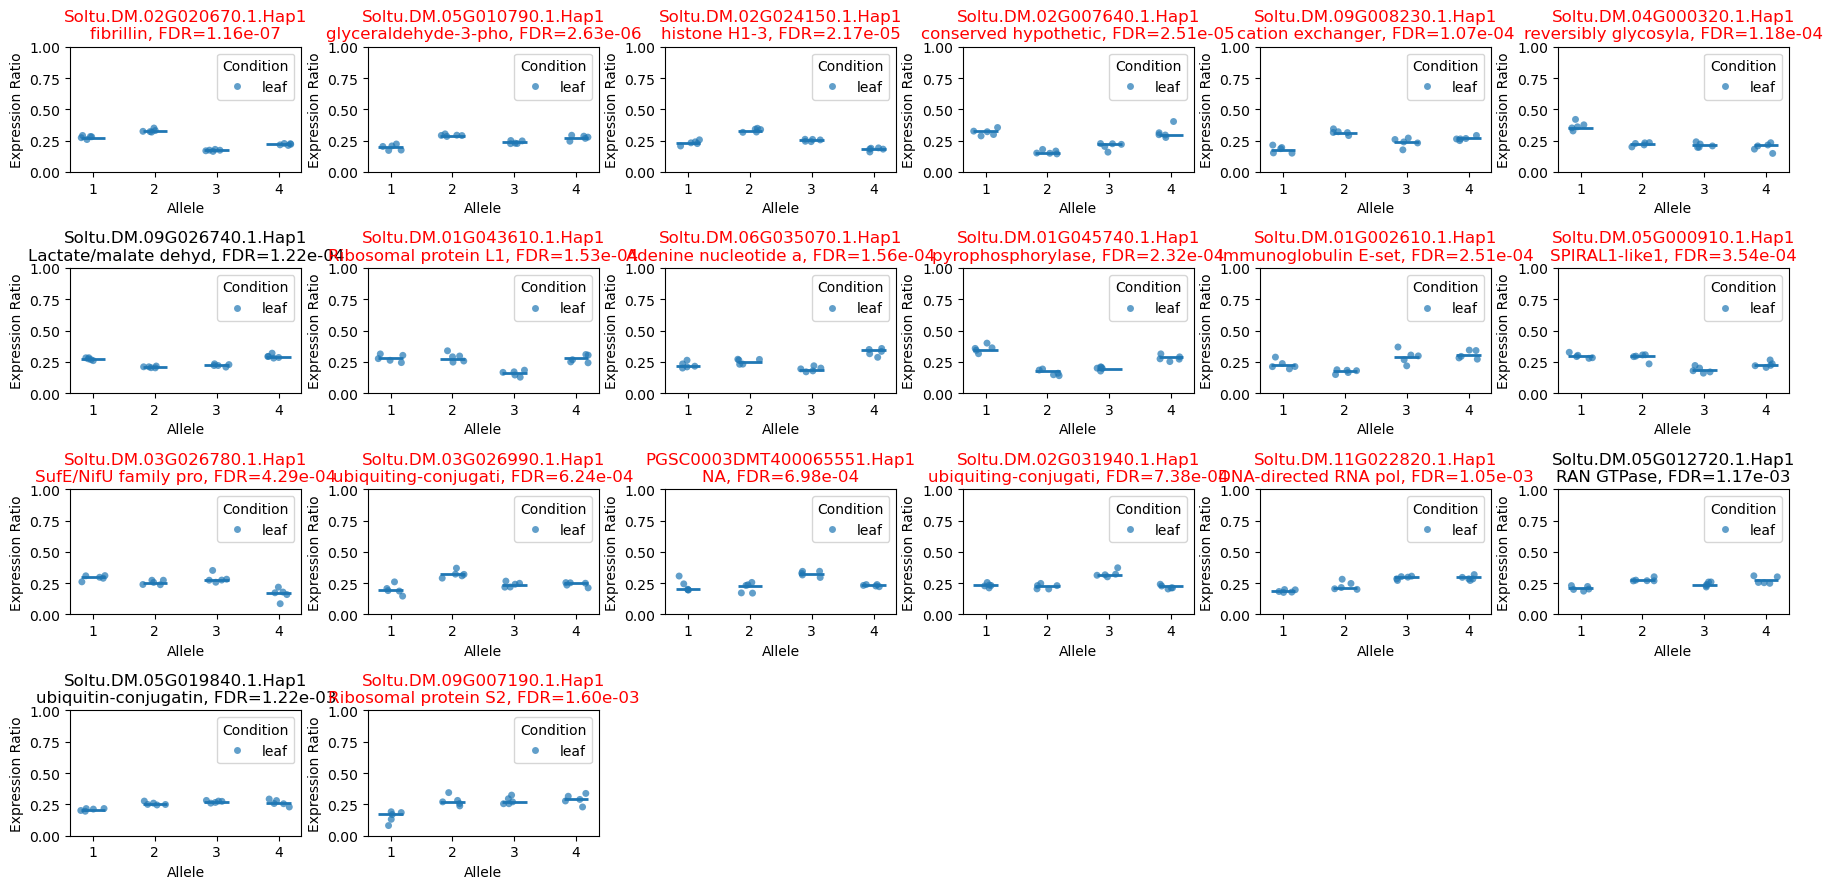

In [24]:
# Filter the syntelog results with balanced expression for plotting
mask = unsignificant_results.index
balanced_cis_results = cis_results_control[cis_results_control['Synt_id'].isin(unsignificant_results.index)]
fig = plot_top_differential_syntelogs(balanced_cis_results, n = 20, figsize = (3*6, 3*3), )

In [25]:
#cis_results_control.to_csv("/scratch/nadjafn/for_yuchao/Desiree_results/desiree_allelic_ratios_results_cpm.tsv", sep="\t")

Running Mercator did not lead to any overrepresentation https://www.plabipd.de/mercator_main.html

### Between conditions


In [26]:
# Filter to only include synteny category "1hap1_1hap2_1hap3_1hap4_s" 

mask = (allelic_data_filtered.var["synteny_category"] == "1hap1_1hap2_1hap3_1hap4_s")
allelic_data_syntelogs = allelic_data_filtered[:,mask].copy()

Using CPM data from layer: unique_cpm
Processing syntelog 100/345
Processing syntelog 200/345
Processing syntelog 300/345
Found 186 from 342 syntelogs with at least one significantly different allelic ratio (FDR < 0.05)


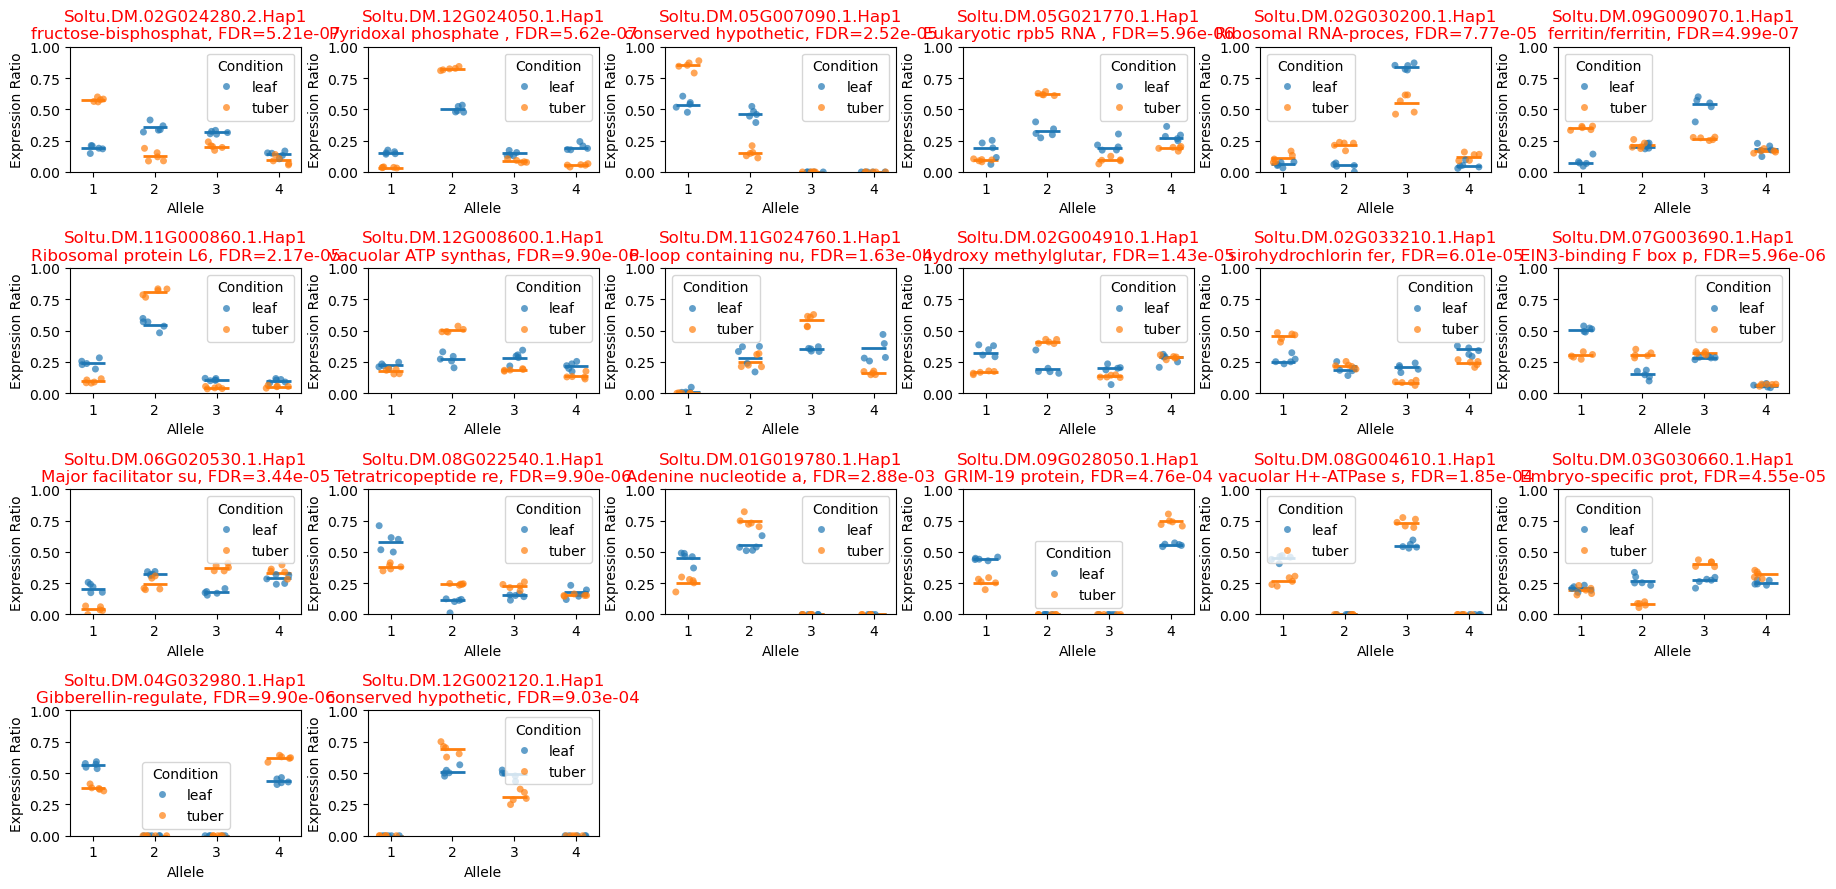

In [27]:
# 1. Run allelic ratio test
results_df_trans = test_allelic_ratios_between_conditions(allelic_data_syntelogs)

# 2. Get top differential syntelogs
top_results_trans = get_top_differential_syntelogs(results_df_trans, n=50, sort_by='ratio_difference', fdr_threshold=0.05)

# 3. Plot the results
#fig = plot_top_differential_syntelogs(top_results_trans,n = 46, figsize=(3*6, 4*3), sort_by='FDR')
#plt.show()
fig = plot_top_differential_syntelogs(top_results_trans, figsize=(6*3, 3*3), n = 20, difference_threshold=0.1, sort_by='ratio_difference', sig_threshold=0.05)


#### Plot Ribosomal protein L3

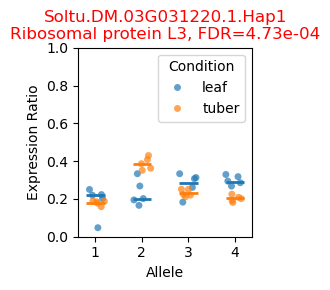

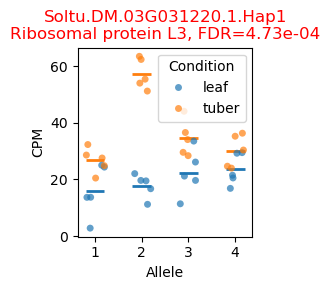

In [28]:
gene_id = "Soltu.DM.03G031220"
import matplotlib.pyplot as plt
# plot next to each other

# filter results for specific synt id
trans_results_filtered_synt = results_df_trans[results_df_trans['gene_id'].str.contains(gene_id)]
ax1 = plot_top_differential_syntelogs(trans_results_filtered_synt, n = 20, figsize = (12, 3*1),sort_by='ratio_difference', )

# filter results for specific synt id
trans_results_filtered_synt = results_df_trans[results_df_trans['gene_id'].str.contains(gene_id)]
ax2 = plot_top_differential_syntelogs(trans_results_filtered_synt, n = 20, figsize = (12, 3*1),sort_by='ratio_difference', plot_type='cpm' )
ax2.savefig(f"/scratch/nadjafn/LR_DESIREE_PAPER/ANALYSIS/final_plots/ATL_trans_{gene_id}_cpm.svg" )

##### Plot vacuolar ATP synthase subunit A

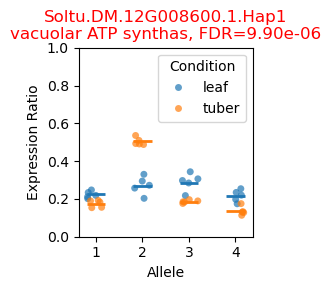

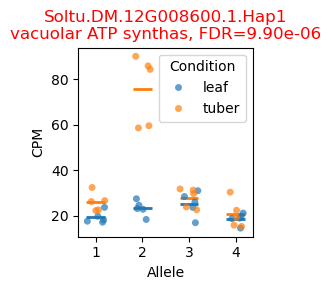

In [29]:
gene_id = "Soltu.DM.12G008600"
import matplotlib.pyplot as plt
# plot next to each other

# filter results for specific synt id
trans_results_filtered_synt = results_df_trans[results_df_trans['gene_id'].str.contains(gene_id)]
ax1 = plot_top_differential_syntelogs(trans_results_filtered_synt, n = 20, figsize = (12, 3*1),sort_by='ratio_difference', )

# filter results for specific synt id
trans_results_filtered_synt = results_df_trans[results_df_trans['gene_id'].str.contains(gene_id)]
ax2 = plot_top_differential_syntelogs(trans_results_filtered_synt, n = 20, figsize = (12, 3*1),sort_by='ratio_difference', plot_type='cpm' )
ax2.savefig(f"/scratch/nadjafn/LR_DESIREE_PAPER/ANALYSIS/final_plots/ATL_trans_{gene_id}_cpm.svg" )

In [30]:
top_results_trans['Unitato_gene_id'] = top_results_trans['gene_id'].apply(lambda x: x.rsplit('.', 1)[0] if isinstance(x, str) else x)
# group by Synt_id and get the min FDR and max ratio_difference
top_results_trans_grouped = top_results_trans.groupby('Synt_id').agg({
    'FDR': 'min',
    'ratio_difference': list , # Assuming this is the correct
    'allele' : list,
    'gene_id': list,
    'Unitato_gene_id': 'first'  # Get unique gene IDs

})
# save the results to a tsv
# top_results_trans_grouped.to_csv('/scratch/nadjafn/LR_DESIREE_PAPER/AI_results/top_results_trans.tsv', sep='\t')


/tmp/ipykernel_2313172/2973864598.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_results_trans['Unitato_gene_id'] = top_results_trans['gene_id'].apply(lambda x: x.rsplit('.', 1)[0] if isinstance(x, str) else x)


## Isoform level analysis

In [31]:

# only keep the isoforms that have enghough gene-level read counts
allelic_data_filtered_isoform = allelic_data[:, allelic_data.var["gene_id"].isin(adata_gene_filtered.var["gene_id"])].copy()
# filter isoforms that have less 

In [32]:
allelic_data_filtered_isoform = calculate_allelic_ratios(allelic_data_filtered_isoform  , 'unique_counts' )
allelic_data_filtered_isoform = calculate_multi_ratios(allelic_data_filtered_isoform , 'unique_counts', 'ambiguous_counts')
allelic_data_filtered_isoform  = calculate_per_allele_ratios(allelic_data_filtered_isoform, unique_layer='unique_counts', multi_layer='ambiguous_counts')

In [33]:
# select only the genes with equal lengths, low multimapping ratio and synteny category "1hap1_1hap2_1hap3_1hap4_s"
mask =  (allelic_data_filtered_isoform .var["multimapping_ratio_per_allele_weighted_average"] < 0.3)
allelic_data_length_filter_isoform = allelic_data_filtered_isoform[:,mask].copy()

# 1. Test for differential allelic ratios withing conditions
DIU_results, DIU_plotting_result = test_isoform_DIU_between_conditions(allelic_data_length_filter_isoform, layer="unique_counts", inplace=True)



Calculating isoform ratios...
Processing gene 100/2256
Processing gene 200/2256
Processing gene 300/2256
Processing gene 400/2256
Processing gene 500/2256
Processing gene 600/2256
Processing gene 700/2256
Processing gene 800/2256
Processing gene 900/2256
Processing gene 1000/2256
Processing gene 1100/2256
Processing gene 1200/2256
Processing gene 1300/2256
Processing gene 1400/2256
Processing gene 1500/2256
Processing gene 1600/2256
Processing gene 1700/2256
Processing gene 1800/2256
Processing gene 1900/2256
Processing gene 2000/2256
Processing gene 2100/2256
Processing gene 2200/2256
Found 14 from 228 genes with at least one significantly different isoform usage (FDR < 0.05)
Skipped 256 isoforms due to zero counts
Created plotting table with 2660 rows (one per replicate, condition, isoform ratio, and transcript)


In [ ]:
ensembl_gtf_path = "/scratch/nadjafn/reference/Atlantic/unitato2Atl.with_chloroplast_and_mito.no_scaffold.agat.gtf"
annotation = RNApy.read_ensembl_gtf(ensembl_gtf_path)

# add the bambu annotations to the annotation dataframe
# with bambu
bambu = "/scratch/nadjafn/nf-core-plantlongrnaseq/output_atlantic_liftoff/gff/combined.fixed.gtf"
bambu_annotation = RNApy.read_ensembl_gtf(bambu)
bambu_annotation = bambu_annotation.filter(pl.col("transcript_id").str.contains("Bambu"))


annotation.extend(bambu_annotation)
annotation_df = annotation.to_pandas()
annotation_df['gene_id_unitato'] = annotation_df['gene_id'].str.rsplit('.', n=1).str[0]

annotation_function = pd.merge(annotation_df,df_annotation, how="left", on="gene_id_unitato")
# set Nan functional annotation to "No_annotation"
annotation_function['functional_annotation'] = annotation_function['functional_annotation'].fillna("No_annotation")
#annotation_function['gene_id'] = annotation_function['functional_annotation']
# back to polar
annotation_function = pl.from_pandas(annotation_function)

In [87]:
figures = plot_differential_isoform_usage(
    results_df=DIU_plotting_result,
    annotation_df=annotation_function,
    fdr_threshold=0.05,
    ratio_difference_threshold=0.3
)

Detected layer: unique_counts (using column: unique_counts_cpm)
Found 14 genes with significant isoforms. Plotting all isoforms for these genes.
Processing gene: Soltu.DM.02G014130.Hap4


Processing gene: Soltu.DM.04G024450.Hap4


/users/nadjafn/.conda/envs/polyase/lib/python3.12/site-packages/RNApysoforms/gene_filtering.py:168: UserWarning:

1 transcript(s) are present in the annotation but missing in the expression matrix. Missing transcripts: BambuTx1632_1. Only transcripts present in both will be returned.



/users/nadjafn/.conda/envs/polyase/lib/python3.12/site-packages/RNApysoforms/gene_filtering.py:168: UserWarning:

2 transcript(s) are present in the annotation but missing in the expression matrix. Missing transcripts: Soltu.DM.06G029200.3.Hap2, Soltu.DM.06G029200.4.Hap2. Only transcripts present in both will be returned.



Processing gene: Soltu.DM.06G029200.Hap2


Processing gene: Soltu.DM.06G029200.Hap4


/users/nadjafn/.conda/envs/polyase/lib/python3.12/site-packages/RNApysoforms/gene_filtering.py:168: UserWarning:

2 transcript(s) are present in the annotation but missing in the expression matrix. Missing transcripts: Soltu.DM.06G029200.3.Hap4, Soltu.DM.06G029200.4.Hap4. Only transcripts present in both will be returned.



Processing gene: Soltu.DM.07G003120.Hap1
Skipping Soltu.DM.07G003120.Hap1 as it has only one transcript
Processing gene: Soltu.DM.07G003120.Hap3
Skipping Soltu.DM.07G003120.Hap3 as it has only one transcript
Processing gene: Soltu.DM.07G022010.Hap1
Skipping Soltu.DM.07G022010.Hap1 as it has only one transcript
Processing gene: Soltu.DM.07G022010.Hap3
Skipping Soltu.DM.07G022010.Hap3 as it has only one transcript
Processing gene: Soltu.DM.07G026360.Hap0


Processing gene: Soltu.DM.09G027190.Hap1


/users/nadjafn/.conda/envs/polyase/lib/python3.12/site-packages/RNApysoforms/gene_filtering.py:168: UserWarning:

1 transcript(s) are present in the annotation but missing in the expression matrix. Missing transcripts: Soltu.DM.09G027190.1.Hap1. Only transcripts present in both will be returned.



Processing gene: Soltu.DM.09G027190.Hap3


/users/nadjafn/.conda/envs/polyase/lib/python3.12/site-packages/RNApysoforms/gene_filtering.py:168: UserWarning:

1 transcript(s) are present in the annotation but missing in the expression matrix. Missing transcripts: Soltu.DM.09G027190.1.Hap3. Only transcripts present in both will be returned.



Processing gene: Soltu.DM.10G027570.Hap0


Processing gene: Soltu.DM.10G027570.Hap2


Processing gene: Soltu.DM.11G022220.Hap1


/users/nadjafn/.conda/envs/polyase/lib/python3.12/site-packages/RNApysoforms/gene_filtering.py:168: UserWarning:

1 transcript(s) are present in the annotation but missing in the expression matrix. Missing transcripts: Soltu.DM.11G022220.3.Hap1. Only transcripts present in both will be returned.



Generated 10 plots for differential isoform usage


##### By structutre

In [36]:
# Step 1: First add exon structure information to your AnnData object
gtf_file = "/scratch/nadjafn/nf-core-plantlongrnaseq/output_atlantic_liftoff/gff/combined.fixed.gtf"

# Add structure information (this only needs to be done once)
add_structure_from_gtf(allelic_data_filtered_isoform , gtf_file, inplace=True, verbose=True)


Loading GTF file: /scratch/nadjafn/nf-core-plantlongrnaseq/output_atlantic_liftoff/gff/combined.fixed.gtf


Processing exon structures...
Processed 250224 transcripts
Exon count distribution:
n_exons
1     70765
2     53581
3     32202
4     19639
5     14515
6     11146
7      9139
8      7440
9      6317
10     5105
Name: count, dtype: int64
Calculated introns for 179459 multi-exon transcripts
Intron count distribution:
n_introns
1     53581
2     32202
3     19639
4     14515
5     11146
6      9139
7      7440
8      6317
9      5105
10     3976
Name: count, dtype: int64
Adding structure information to AnnData.var...
Matched structure information for 4766/4766 transcripts
Successfully added exon structure information for 250224 transcripts
  - Intron structures calculated for multi-exon transcripts


In [83]:
mask = (
    (allelic_data_filtered_isoform.var["multimapping_ratio_per_allele_weighted_average"] < 0.6) & 
    (allelic_data_filtered_isoform.var["synteny_category"].str.contains(
        "1hap1_1hap2_1hap3_1hap4_s",
        na=False
    ))
)

allelic_data_test = allelic_data_filtered_isoform[:,mask].copy()


# Step 2: Run structure-based DIU analysis
print("Running structure-based differential isoform usage analysis...")

Synt_id = 'Synt_id_59067'
mask = allelic_data_test.var["Synt_id"] == Synt_id
allelic_data_test_synt = allelic_data_test[:,mask].copy()
results_DIU_allele, results_DIU_plotting = test_differential_isoform_structure(
    allelic_data_test, 
    layer="unique_counts",
    test_condition="all",  # or "all" to use all conditions
    min_similarity_for_matching=0.90,
    inplace=True

)


Running structure-based differential isoform usage analysis...
DEBUG: Found 10 samples for condition 'all'
DEBUG: Found 330 syntelogs to process

DEBUG Syntelog Synt_id_39395: 4 haplotypes, 4 transcripts
DEBUG: Haplotype expressions: {'hap2': np.int64(1108), 'hap3': np.int64(1075), 'hap1': np.int64(1476), 'hap4': np.int64(1416)}
DEBUG: Selected reference haplotype: hap1 (expression=1476)
DEBUG: Reference haplotype hap1 has 1 isoforms
  Soltu.DM.06G027840.1.Hap1: expression=1476
  hap2: Matched to MAJOR (Soltu.DM.06G027840.1.Hap2, sim=1.000)
  hap3: Matched to MAJOR (Soltu.DM.06G027840.1.Hap3, sim=1.000)
  hap4: Matched to MAJOR (Soltu.DM.06G027840.1.Hap4, sim=1.000)
DEBUG: Found 4 haplotype matches
DEBUG: Major on all haplotypes: True
DEBUG: Testing using MAJOR isoform
DEBUG: Reference counts: [ 55  27 134], totals: [ 55  27 134]

DEBUG Syntelog Synt_id_12347: 4 haplotypes, 4 transcripts
DEBUG: Haplotype expressions: {'hap4': np.int64(2464), 'hap1': np.int64(3255), 'hap2': np.int64(322

In [66]:
allelic_data_test_synt.var

transcript_id                  gene_id  \
original_index                                                                  
BambuTx3983_2              Soltu.DM.11G023050.1.Hap2  Soltu.DM.11G023050.Hap2   
BambuTx4008_2              Soltu.DM.11G023050.1.Hap3  Soltu.DM.11G023050.Hap3   
Soltu.DM.11G023050.1.Hap3  Soltu.DM.11G023050.1.Hap3  Soltu.DM.11G023050.Hap3   
Soltu.DM.11G023050.1.Hap1  Soltu.DM.11G023050.1.Hap1  Soltu.DM.11G023050.Hap1   
BambuTx3983_1              Soltu.DM.11G023050.1.Hap3  Soltu.DM.11G023050.Hap3   
BambuTx3983                Soltu.DM.11G023050.1.Hap1  Soltu.DM.11G023050.Hap1   
BambuTx4008_3              Soltu.DM.11G023050.1.Hap4  Soltu.DM.11G023050.Hap4   
Soltu.DM.11G023050.1.Hap4  Soltu.DM.11G023050.1.Hap4  Soltu.DM.11G023050.Hap4   
BambuTx4008_1              Soltu.DM.11G023050.1.Hap1  Soltu.DM.11G023050.Hap1   
Soltu.DM.11G023050.1.Hap2  Soltu.DM.11G023050.1.Hap2  Soltu.DM.11G023050.Hap2   
BambuTx3983_4              Soltu.DM.11G023050.1.Hap4  Soltu.DM.11G023050.Hap4   

                          feature_type        Synt_id  \
original_index                                          
BambuTx3983_2               transcript  Synt_id_59067   
BambuTx4008_2               transcript  Synt_id_59067   
Soltu.DM.11G023050.1.Hap3   transcript  Synt_id_59067   
Soltu.DM.11G023050.1.Hap1   transcript  Synt_id_59067   
BambuTx3983_1               transcript  Synt_id_59067   
BambuTx3983                 transcript  Synt_id_59067   
BambuTx4008_3               transcript  Synt_id_59067   
Soltu.DM.11G023050.1.Hap4   transcript  Synt_id_59067   
BambuTx4008_1               transcript  Synt_id_59067   
Soltu.DM.11G023050.1.Hap2   transcript  Synt_id_59067   
BambuTx3983_4               transcript  Synt_id_59067   

                                    synteny_category  \
original_index                                         
BambuTx3983_2              1hap1_1hap2_1hap3_1hap4_s   
BambuTx4008_2              1hap1_1hap2_1hap3_1hap4_s   
Soltu.DM.11G023050.1.Hap3  1hap1_1hap2_1hap3_1hap4_s   
Soltu.DM.11G023050.1.Hap1  1hap1_1hap2_1hap3_1hap4_s   
BambuTx3983_1              1hap1_1hap2_1hap3_1hap4_s   
BambuTx3983                1hap1_1hap2_1hap3_1hap4_s   
BambuTx4008_3              1hap1_1hap2_1hap3_1hap4_s   
Soltu.DM.11G023050.1.Hap4  1hap1_1hap2_1hap3_1hap4_s   
BambuTx4008_1              1hap1_1hap2_1hap3_1hap4_s   
Soltu.DM.11G023050.1.Hap2  1hap1_1hap2_1hap3_1hap4_s   
BambuTx3983_4              1hap1_1hap2_1hap3_1hap4_s   

                                                              syntenic_genes  \
original_index                                                                 
BambuTx3983_2              Soltu.DM.11G023050.1.Hap1,Soltu.DM.11G023050.1...   
BambuTx4008_2              Soltu.DM.11G023050.1.Hap1,Soltu.DM.11G023050.1...   
Soltu.DM.11G023050.1.Hap3  Soltu.DM.11G023050.1.Hap1,Soltu.DM.11G023050.1...   
Soltu.DM.11G023050.1.Hap1  Soltu.DM.11G023050.1.Hap1,Soltu.DM.11G023050.1...   
BambuTx3983_1              Soltu.DM.11G023050.1.Hap1,Soltu.DM.11G023050.1...   
BambuTx3983                Soltu.DM.11G023050.1.Hap1,Soltu.DM.11G023050.1...   
BambuTx4008_3              Soltu.DM.11G023050.1.Hap1,Soltu.DM.11G023050.1...   
Soltu.DM.11G023050.1.Hap4  Soltu.DM.11G023050.1.Hap1,Soltu.DM.11G023050.1...   
BambuTx4008_1              Soltu.DM.11G023050.1.Hap1,Soltu.DM.11G023050.1...   
Soltu.DM.11G023050.1.Hap2  Soltu.DM.11G023050.1.Hap1,Soltu.DM.11G023050.1...   
BambuTx3983_4              Soltu.DM.11G023050.1.Hap1,Soltu.DM.11G023050.1...   

                          haplotype CDS_length_category  \
original_index                                            
BambuTx3983_2                  hap2  less_1%_difference   
BambuTx4008_2                  hap3  less_1%_difference   
Soltu.DM.11G023050.1.Hap3      hap3  less_1%_difference   
Soltu.DM.11G023050.1.Hap1      hap1  less_1%_difference   
BambuTx3983_1                  hap3  less_1%_difference   
BambuTx3983                    hap1  less_1%_difference   
B

In [77]:
def test_differential_isoform_structure(
    adata, layer="unique_counts", test_condition="control",
    min_similarity_for_matching=0.4,
    use_introns=True,
    exon_weight=0.6,
    intron_weight=0.4,
    inplace=True, 
    verbose=False,
    return_plotting_data=True
):
    """
    Test for DIU between alleles with intelligent major/minor isoform fallback.
    
    IMPROVED VERSION:
    - Includes isoforms in plotting data even if they have zero expression in reference haplotype
    - Matches zero-expressed reference isoforms with corresponding isoforms in other haplotypes
    
    Returns
    -------
    tuple or pd.DataFrame
        If return_plotting_data=True: returns (results_df, plotting_df)
        If return_plotting_data=False: returns results_df only
    """
    import pandas as pd
    import numpy as np
    import re
    from statsmodels.stats.multitest import multipletests
    from isotools._transcriptome_stats import betabinom_lr_test
    from anndata import AnnData
    
    if not isinstance(adata, AnnData):
        raise ValueError("Input must be an AnnData object")
    
    if layer not in adata.layers:
        raise ValueError(f"Layer '{layer}' not found")
    
    required_cols = ['Synt_id', 'haplotype']
    for col in required_cols:
        if col not in adata.var.columns:
            raise ValueError(f"Required column '{col}' not found in adata.var")
    
    if 'exon_lengths' not in adata.uns:
        raise ValueError("'exon_lengths' not found in adata.uns. Run add_exon_structure() first")
    
    if use_introns and 'intron_lengths' not in adata.uns:
        print("Warning: use_introns=True but 'intron_lengths' not found. Using only exon structures")
        use_introns = False
    
    if not inplace:
        adata = adata.copy()
    
    counts = adata.layers[layer]
    synt_ids = adata.var["Synt_id"]
    haplotypes = adata.var["haplotype"]
    transcript_ids = adata.var_names
    exon_lengths_dict = adata.uns['exon_lengths']
    intron_lengths_dict = adata.uns.get('intron_lengths', {}) if use_introns else {}
    gene_ids = adata.var.get("gene_id", pd.Series([None] * len(adata.var), index=adata.var_names))
    
    if test_condition == "all":
        condition_indices = np.arange(counts.shape[0])
        condition_values = adata.obs['condition'].values
    else:
        if 'condition' not in adata.obs.columns:
            raise ValueError("'condition' not found in adata.obs")
        condition_indices = np.where(adata.obs['condition'] == test_condition)[0]
        condition_values = [test_condition] * len(condition_indices)
    
    print(f"DEBUG: Found {len(condition_indices)} samples for condition '{test_condition}'")
    
    sample_names = adata.obs_names[condition_indices]
    unique_syntelogs = synt_ids.dropna().unique()
    unique_syntelogs = unique_syntelogs[unique_syntelogs != 0]
    
    print(f"DEBUG: Found {len(unique_syntelogs)} syntelogs to process")
    
    results = []
    plotting_data = []
    
    stats = {
        'total': len(unique_syntelogs),
        'tested': 0,
        'comparisons': 0,
        'major_used': 0,
        'minor_used': 0,
        'failed': 0,
        'fail_reasons': {
            'no_indices': 0,
            'single_haplotype': 0,
            'no_major': 0,
            'no_matches': 0,
            'major_not_on_all_no_minor': 0,
            'no_reference': 0,
            'zero_counts': 0,
            'test_error': 0
        }
    }
    
    if verbose:
        print(f"Processing {len(unique_syntelogs)} syntelogs with major/minor fallback logic...")
        print(f"Using {'exon+intron' if use_introns else 'exon-only'} structures")
    
    for synt_idx, synt_id in enumerate(unique_syntelogs):
        if verbose and synt_idx % 100 == 0:
            print(f"Progress: {synt_idx}/{len(unique_syntelogs)}")
        
        synt_mask = synt_ids == synt_id
        synt_indices = np.where(synt_mask)[0]
        
        if len(synt_indices) == 0:
            stats['fail_reasons']['no_indices'] += 1
            stats['failed'] += 1
            continue
        
        synt_haplotypes = haplotypes.iloc[synt_indices]
        unique_haplotypes = synt_haplotypes.dropna().unique()
        
        if len(unique_haplotypes) < 2:
            stats['fail_reasons']['single_haplotype'] += 1
            stats['failed'] += 1
            continue
        
        if synt_idx < 3:
            print(f"\nDEBUG Syntelog {synt_id}: {len(unique_haplotypes)} haplotypes, {len(synt_indices)} transcripts")
        
        # IMPROVED: Identify ALL isoforms in reference haplotype, not just major/minor
        reference_haplotype, major_isoform, minor_isoform, all_ref_isoforms = _identify_all_reference_isoforms(
            synt_indices, haplotypes, transcript_ids,
            exon_lengths_dict, intron_lengths_dict,
            counts, condition_indices,
            verbose=synt_idx < 3
        )
        
        if not major_isoform:
            stats['fail_reasons']['no_major'] += 1
            stats['failed'] += 1
            continue
        
        haplotype_matches = _match_isoforms_across_haplotypes(
            synt_indices, unique_haplotypes, synt_haplotypes, transcript_ids,
            exon_lengths_dict, intron_lengths_dict,
            reference_haplotype, major_isoform, minor_isoform,
            counts, condition_indices,
            min_similarity_for_matching=min_similarity_for_matching,
            verbose=synt_idx < 3
        )
        
        if synt_idx < 3:
            print(f"DEBUG: Found {len(haplotype_matches)} haplotype matches")
        
        if len(haplotype_matches) < 2:
            stats['fail_reasons']['no_matches'] += 1
            stats['failed'] += 1
            continue
        
        major_on_all = all(match['matched_isoform_type'] == 'major' for match in haplotype_matches.values())
        
        if synt_idx < 3:
            print(f"DEBUG: Major on all haplotypes: {major_on_all}")
        
        if major_on_all:
            isoform_type_for_testing = 'major'
            reference_structure_exon = major_isoform['exon_structure']
            reference_structure_intron = major_isoform['intron_structure']
            reference_transcript = major_isoform['transcript_id']
            stats['major_used'] += 1
        elif minor_isoform:
            isoform_type_for_testing = 'minor'
            reference_structure_exon = minor_isoform['exon_structure']
            reference_structure_intron = minor_isoform['intron_structure']
            reference_transcript = minor_isoform['transcript_id']
            stats['minor_used'] += 1
            
            filtered_matches = {}
            for hap, match in haplotype_matches.items():
                if hap == reference_haplotype:
                    filtered_matches[hap] = {
                        'matched_isoform_type': 'minor',
                        'transcript_id': minor_isoform['transcript_id'],
                        'transcript_idx': minor_isoform['transcript_idx'],
                        'exon_structure': minor_isoform['exon_structure'],
                        'intron_structure': minor_isoform['intron_structure'],
                        'similarity_to_major': match['similarity_to_major'],
                        'similarity_to_minor': 1.0,
                        'expression': minor_isoform.get('expression', 0),
                        'n_isoforms_in_haplotype': match['n_isoforms_in_haplotype']
                    }
                elif match['matched_isoform_type'] == 'minor':
                    filtered_matches[hap] = match
            
            haplotype_matches = filtered_matches
            
            if synt_idx < 3:
                print(f"DEBUG: After filtering for minor, {len(haplotype_matches)} haplotypes remain")
            
            if len(haplotype_matches) < 2:
                stats['fail_reasons']['no_matches'] += 1
                stats['failed'] += 1
                continue
        else:
            stats['fail_reasons']['major_not_on_all_no_minor'] += 1
            stats['failed'] += 1
            continue
        
        if synt_idx < 3:
            print(f"DEBUG: Testing using {isoform_type_for_testing.upper()} isoform")
        
        if reference_haplotype not in haplotype_matches:
            if synt_idx < 3:
                print(f"DEBUG ERROR: Reference haplotype {reference_haplotype} not in matches!")
            stats['fail_reasons']['no_reference'] += 1
            stats['failed'] += 1
            continue
        
        ref_match = haplotype_matches[reference_haplotype]
        ref_hap_mask = synt_haplotypes == reference_haplotype
        ref_hap_indices = synt_indices[np.where(ref_hap_mask)[0]]
        ref_isoform_counts = counts[np.ix_(condition_indices, [ref_match['transcript_idx']])].flatten()
        ref_hap_totals = np.sum(counts[np.ix_(condition_indices, ref_hap_indices)], axis=1)
        
        if synt_idx < 3:
            print(f"DEBUG: Reference counts: {ref_isoform_counts[:3]}, totals: {ref_hap_totals[:3]}")
        
        comparisons_made = 0
        for other_hap, other_match in haplotype_matches.items():
            if other_hap == reference_haplotype:
                continue
            
            other_hap_mask = synt_haplotypes == other_hap
            other_hap_indices = synt_indices[np.where(other_hap_mask)[0]]
            other_isoform_counts = counts[np.ix_(condition_indices, [other_match['transcript_idx']])].flatten()
            other_hap_totals = np.sum(counts[np.ix_(condition_indices, other_hap_indices)], axis=1)
            
            if np.all(ref_isoform_counts == 0) or np.all(other_isoform_counts == 0):
                stats['fail_reasons']['zero_counts'] += 1
                continue
            if np.all(ref_hap_totals == 0) or np.all(other_hap_totals == 0):
                stats['fail_reasons']['zero_counts'] += 1
                continue
            
            try:
                test_result = betabinom_lr_test(
                    [ref_isoform_counts.astype(int), other_isoform_counts.astype(int)],
                    [ref_hap_totals.astype(int), other_hap_totals.astype(int)]
                )
                p_value = test_result[0]
                ratio_stats = test_result[1]
                ratio_difference = abs(ratio_stats[0] - ratio_stats[2])
            except Exception as e:
                if synt_idx < 3:
                    print(f"DEBUG: Error in test: {str(e)}")
                stats['fail_reasons']['test_error'] += 1
                continue
            
            stats['comparisons'] += 1
            comparisons_made += 1
            
            results.append({
                'Synt_id': synt_id,
                'reference_haplotype': reference_haplotype,
                'comparison_haplotype': other_hap,
                'reference_transcript': reference_transcript,
                'comparison_transcript': other_match['transcript_id'],
                'isoform_type_tested': isoform_type_for_testing,
                'p_value': p_value,
                'ratio_difference': ratio_difference,
                'reference_ratio_mean': ratio_stats[0],
                'comparison_ratio_mean': ratio_stats[2],
            })
        
        if comparisons_made > 0:
            stats['tested'] += 1
        
        # IMPROVED: Create plotting data that includes ALL isoforms from reference haplotype
        if return_plotting_data and comparisons_made > 0:
            gene_id = gene_ids.get(reference_transcript, None)
            library_sizes = np.sum(counts[condition_indices, :], axis=1)
            
            # IMPROVED: Build comprehensive isoform matching for ALL reference isoforms
            all_haplotype_isoform_matches = _match_all_isoforms_for_plotting(
                all_ref_isoforms,
                unique_haplotypes,
                synt_haplotypes,
                synt_indices,
                transcript_ids,
                exon_lengths_dict,
                intron_lengths_dict,
                reference_haplotype,
                major_isoform,
                minor_isoform,
                min_similarity_for_matching=min_similarity_for_matching
            )
            
            # Now generate plotting data for ALL matched isoforms
            for hap in unique_haplotypes:
                hap_mask = synt_haplotypes == hap
                hap_indices = synt_indices[np.where(hap_mask)[0]]
                
                if len(hap_indices) == 0:
                    continue
                
                # For each reference isoform, add plotting data
                for ref_iso in all_ref_isoforms:
                    ref_iso_id = ref_iso['transcript_id']
                    ref_iso_rank = ref_iso['rank']  # 'major', 'minor', or 'other'
                    
                    # Find matched isoform in this haplotype
                    matched_info = all_haplotype_isoform_matches.get((hap, ref_iso_id), None)
                    
                    if matched_info is not None:
                        matched_transcript_idx = matched_info['transcript_idx']
                        matched_transcript_id = matched_info['transcript_id']
                        similarity = matched_info['similarity']
                    else:
                        # No match found - use zeros
                        matched_transcript_idx = None
                        matched_transcript_id = ref_iso_id
                        similarity = 0.0
                    
                    # Calculate metrics for each sample
                    for sample_idx, (cond_idx, samp_name, cond) in enumerate(zip(condition_indices, sample_names, condition_values)):
                        hap_total = np.sum(counts[cond_idx, hap_indices])
                        
                        if matched_transcript_idx is not None:
                            iso_counts = counts[cond_idx, matched_transcript_idx]
                            iso_ratio = iso_counts / hap_total if hap_total > 0 else 0.0
                            lib_size = library_sizes[sample_idx]
                            iso_cpm = (iso_counts / lib_size) * 1e6 if lib_size > 0 else 0.0
                        else:
                            iso_counts = 0
                            iso_ratio = 0.0
                            iso_cpm = 0.0
                        
                        plotting_data.append({
                            'Synt_id': synt_id,
                            'gene_id': gene_id,
                            'haplotype': hap,
                            'sample': samp_name,
                            'condition': cond,
                            'isoform_rank': ref_iso_rank,
                            'isoform_id': ref_iso_id,  # Reference isoform ID
                            'transcript_id': matched_transcript_id,  # Actual matched transcript
                            'isoform_ratio': float(iso_ratio),
                            'isoform_counts': int(iso_counts),
                            f'{layer}_isoform_counts': int(iso_counts),
                            'isoform_cpm': float(iso_cpm),
                            f'{layer}_cpm': float(iso_cpm),
                            f'{layer}_total_counts': int(hap_total),
                            'similarity_to_reference': float(similarity),
                            'reference_haplotype': reference_haplotype,
                            'is_reference_haplotype': hap == reference_haplotype,
                            'ratio_difference': 0.0,  # Will be filled in later
                            'has_expression': iso_counts > 0
                        })
    
    # Convert results to DataFrame
    results_df = pd.DataFrame(results)
    
    print(f"\nDetailed failure reasons:")
    for reason, count in stats['fail_reasons'].items():
        if count > 0:
            print(f"  {reason}: {count}")
    
    if len(results_df) > 0:
        results_df['FDR'] = multipletests(results_df['p_value'], method='fdr_bh')[1]
        results_df = results_df.sort_values('p_value')
        
        significant = results_df[(results_df['FDR'] < 0.05) & (results_df['ratio_difference'] > 0.2)]
        
        print(f"\nResults Summary:")
        print(f"  Total syntelogs: {stats['total']}")
        print(f"  Successfully tested: {stats['tested']}")
        print(f"  Pairwise comparisons: {stats['comparisons']}")
        print(f"  Using MAJOR isoform: {stats['major_used']}")
        print(f"  Using MINOR isoform (fallback): {stats['minor_used']}")
        print(f"  Failed to test: {stats['failed']}")
        print(f"  Significant comparisons: {len(significant)}")
        if stats['tested'] > 0:
            print(f"  Minor fallback rate: {stats['minor_used']/stats['tested']*100:.1f}%")
    else:
        print("\nNo results generated!")
    
    # Return based on return_plotting_data parameter
    if return_plotting_data:
        plotting_df = pd.DataFrame(plotting_data)
        
        if len(plotting_df) > 0 and len(results_df) > 0:
            # Map the actual ratio_difference from results to plotting data
            synt_stats = results_df.groupby('Synt_id').agg({
                'p_value': 'min',
                'FDR': 'min',
                'ratio_difference': 'max'
            }).reset_index()
            
            # Merge the statistics into plotting data
            plotting_df = plotting_df.merge(
                synt_stats[['Synt_id', 'p_value', 'FDR', 'ratio_difference']],
                on='Synt_id',
                how='left',
                suffixes=('_old', '')
            )
            
            # Drop the old ratio_difference column if it exists
            if 'ratio_difference_old' in plotting_df.columns:
                plotting_df = plotting_df.drop(columns=['ratio_difference_old'])
            
            if verbose:
                print(f"\nPlotting data created:")
                print(f"  Total rows: {len(plotting_df)}")
                print(f"  Syntelogs: {plotting_df['Synt_id'].nunique()}")
                print(f"  Unique isoforms: {plotting_df['isoform_id'].nunique()}")
                print(f"  Major isoform rows: {(plotting_df['isoform_rank'] == 'major').sum()}")
                print(f"  Minor isoform rows: {(plotting_df['isoform_rank'] == 'minor').sum()}")
                print(f"  Other isoform rows: {(plotting_df['isoform_rank'] == 'other').sum()}")
                print(f"  Rows with expression: {plotting_df['has_expression'].sum()}")
                print(f"  Rows without expression: {(~plotting_df['has_expression']).sum()}")
        
        return results_df, plotting_df
    else:
        return results_df


def _identify_all_reference_isoforms(
    synt_indices, haplotypes, transcript_ids,
    exon_lengths_dict, intron_lengths_dict,
    counts, condition_indices,
    verbose=False
):
    """
    Identify ALL isoforms in the reference haplotype, including those with zero expression.
    Reference haplotype is chosen as the one with highest total expression.
    
    Returns
    -------
    tuple
        (reference_haplotype, major_isoform_dict, minor_isoform_dict, all_isoforms_list)
    """
    import numpy as np
    
    # Get haplotypes for this syntelog
    synt_haplotypes = haplotypes.iloc[synt_indices]
    unique_haplotypes = synt_haplotypes.dropna().unique()
    
    # Choose reference haplotype as the one with highest total expression
    haplotype_expressions = {}
    for hap in unique_haplotypes:
        hap_mask = synt_haplotypes == hap
        hap_indices = synt_indices[np.where(hap_mask)[0]]
        total_expr = np.sum(counts[np.ix_(condition_indices, hap_indices)])
        haplotype_expressions[hap] = total_expr
    
    # Select haplotype with maximum expression
    reference_haplotype = max(haplotype_expressions, key=haplotype_expressions.get)
    
    if verbose:
        print(f"DEBUG: Haplotype expressions: {haplotype_expressions}")
        print(f"DEBUG: Selected reference haplotype: {reference_haplotype} (expression={haplotype_expressions[reference_haplotype]})")
    
    # Get all transcripts from reference haplotype
    ref_hap_mask = synt_haplotypes == reference_haplotype
    ref_hap_indices = synt_indices[np.where(ref_hap_mask)[0]]
    
    # Calculate expression for each transcript
    isoform_expressions = []
    for idx in ref_hap_indices:
        tid = transcript_ids[idx]
        total_expr = np.sum(counts[np.ix_(condition_indices, [idx])])
        
        isoform_expressions.append({
            'transcript_id': tid,
            'transcript_idx': idx,
            'expression': total_expr,
            'exon_structure': exon_lengths_dict.get(tid, []),
            'intron_structure': intron_lengths_dict.get(tid, [])
        })
    
    # Sort by expression
    isoform_expressions.sort(key=lambda x: x['expression'], reverse=True)
    
    if verbose:
        print(f"DEBUG: Reference haplotype {reference_haplotype} has {len(isoform_expressions)} isoforms")
        for iso in isoform_expressions[:3]:
            print(f"  {iso['transcript_id']}: expression={iso['expression']}")
    
    # Identify major and minor
    major_isoform = isoform_expressions[0] if len(isoform_expressions) > 0 else None
    minor_isoform = isoform_expressions[1] if len(isoform_expressions) > 1 else None
    
    # Assign ranks to all isoforms
    all_isoforms = []
    for i, iso in enumerate(isoform_expressions):
        iso_copy = iso.copy()
        if i == 0:
            iso_copy['rank'] = 'major'
        elif i == 1:
            iso_copy['rank'] = 'minor'
        else:
            iso_copy['rank'] = 'other'
        all_isoforms.append(iso_copy)
    
    return reference_haplotype, major_isoform, minor_isoform, all_isoforms


def _match_all_isoforms_for_plotting(
    all_ref_isoforms,
    unique_haplotypes,
    synt_haplotypes,
    synt_indices,
    transcript_ids,
    exon_lengths_dict,
    intron_lengths_dict,
    reference_haplotype,
    major_isoform,
    minor_isoform,
    min_similarity_for_matching=0.4
):
    """
    Match ALL reference isoforms (including zero-expressed ones) to isoforms in other haplotypes.
    
    Returns
    -------
    dict
        Key: (haplotype, ref_isoform_id), Value: {'transcript_idx', 'transcript_id', 'similarity'}
    """
    import numpy as np
    
    matches = {}
    
    for hap in unique_haplotypes:
        hap_mask = synt_haplotypes == hap
        hap_indices = synt_indices[np.where(hap_mask)[0]]
        
        if len(hap_indices) == 0:
            continue
        
        # For each reference isoform, find best match in this haplotype
        for ref_iso in all_ref_isoforms:
            ref_iso_id = ref_iso['transcript_id']
            ref_exon_struct = ref_iso['exon_structure']
            ref_intron_struct = ref_iso['intron_structure']
            
            # If this is the reference haplotype, use direct match
            if hap == reference_haplotype:
                matches[(hap, ref_iso_id)] = {
                    'transcript_idx': ref_iso['transcript_idx'],
                    'transcript_id': ref_iso_id,
                    'similarity': 1.0
                }
                continue
            
            # Find best matching transcript in this haplotype
            best_match_idx = None
            best_similarity = 0.0
            
            for idx in hap_indices:
                tid = transcript_ids[idx]
                exon_struct = exon_lengths_dict.get(tid, [])
                intron_struct = intron_lengths_dict.get(tid, [])
                
                similarity = _calculate_combined_structure_similarity(
                    ref_exon_struct, exon_struct,
                    ref_intron_struct, intron_struct
                )
                
                if similarity > best_similarity:
                    best_similarity = similarity
                    best_match_idx = idx
            
            # Only add if similarity meets threshold
            if best_match_idx is not None and best_similarity >= min_similarity_for_matching:
                matches[(hap, ref_iso_id)] = {
                    'transcript_idx': best_match_idx,
                    'transcript_id': transcript_ids[best_match_idx],
                    'similarity': best_similarity
                }
    
    return matches




def _identify_major_minor_isoforms(
    synt_indices, haplotypes, transcript_ids,
    exon_lengths_dict, intron_lengths_dict,
    counts, condition_indices, verbose=False
):
    """Identify the reference haplotype and its major/minor isoforms."""
    import numpy as np
    synt_haplotypes = haplotypes.iloc[synt_indices]
    unique_haplotypes = synt_haplotypes.dropna().unique()
    
    # Find the most expressed haplotype
    haplotype_expressions = {}
    for hap in unique_haplotypes:
        hap_mask = synt_haplotypes == hap
        hap_indices_local = np.where(hap_mask)[0]
        hap_indices_global = synt_indices[hap_indices_local]
        total_expr = np.sum(counts[np.ix_(condition_indices, hap_indices_global)])
        haplotype_expressions[hap] = total_expr
    
    reference_haplotype = max(haplotype_expressions, key=haplotype_expressions.get)
    
    if verbose:
        print(f"  Reference haplotype: {reference_haplotype} (expression: {haplotype_expressions[reference_haplotype]:.0f})")
    
    # Get all isoforms from reference haplotype
    ref_hap_mask = synt_haplotypes == reference_haplotype
    ref_hap_indices_local = np.where(ref_hap_mask)[0]
    ref_hap_indices_global = synt_indices[ref_hap_indices_local]
    
    ref_isoforms = []
    for idx in ref_hap_indices_global:
        transcript_id = transcript_ids[idx]
        total_expr = np.sum(counts[np.ix_(condition_indices, [idx])])
        exon_structure = exon_lengths_dict.get(transcript_id, [])
        intron_structure = intron_lengths_dict.get(transcript_id, [])
        
        ref_isoforms.append({
            'transcript_id': transcript_id,
            'transcript_idx': idx,
            'expression': total_expr,
            'exon_structure': exon_structure,
            'intron_structure': intron_structure
        })
    
    ref_isoforms.sort(key=lambda x: x['expression'], reverse=True)
    
    major_isoform = ref_isoforms[0] if ref_isoforms else None
    minor_isoform = ref_isoforms[1] if len(ref_isoforms) > 1 else None
    
    if verbose and major_isoform:
        print(f"  Major isoform: {major_isoform['transcript_id']} (expression: {major_isoform['expression']:.0f})")
        if minor_isoform:
            print(f"  Minor isoform: {minor_isoform['transcript_id']} (expression: {minor_isoform['expression']:.0f})")
    
    return reference_haplotype, major_isoform, minor_isoform


def _match_isoforms_across_haplotypes(
    synt_indices, unique_haplotypes, synt_haplotypes, transcript_ids,
    exon_lengths_dict, intron_lengths_dict,
    reference_haplotype, major_isoform, minor_isoform,
    counts, condition_indices,
    min_similarity_for_matching=0.4,
    verbose=False
):
    """Match major and minor isoforms across all haplotypes."""
    import numpy as np
    haplotype_matches = {}
    
    for hap in unique_haplotypes:
        hap_mask = synt_haplotypes == hap
        hap_indices_local = np.where(hap_mask)[0]
        hap_indices_global = synt_indices[hap_indices_local]
        
        if len(hap_indices_global) == 0:
            continue
        
        if hap == reference_haplotype:
            haplotype_matches[hap] = {
                'matched_isoform_type': 'major',
                'transcript_id': major_isoform['transcript_id'],
                'transcript_idx': major_isoform['transcript_idx'],
                'exon_structure': major_isoform['exon_structure'],
                'intron_structure': major_isoform['intron_structure'],
                'similarity_to_major': 1.0,
                'similarity_to_minor': 1.0 if minor_isoform else None,
                'n_isoforms_in_haplotype': len(hap_indices_global)
            }
            continue
        
        candidates = []
        for idx in hap_indices_global:
            transcript_id = transcript_ids[idx]
            total_expr = np.sum(counts[np.ix_(condition_indices, [idx])])
            exon_structure = exon_lengths_dict.get(transcript_id, [])
            intron_structure = intron_lengths_dict.get(transcript_id, [])
            
            similarity_to_major = _calculate_combined_structure_similarity(
                major_isoform['exon_structure'], exon_structure,
                major_isoform['intron_structure'], intron_structure
            )
            
            similarity_to_minor = None
            if minor_isoform:
                similarity_to_minor = _calculate_combined_structure_similarity(
                    minor_isoform['exon_structure'], exon_structure,
                    minor_isoform['intron_structure'], intron_structure
                )
            
            candidates.append({
                'transcript_id': transcript_id,
                'transcript_idx': idx,
                'expression': total_expr,
                'exon_structure': exon_structure,
                'intron_structure': intron_structure,
                'similarity_to_major': similarity_to_major,
                'similarity_to_minor': similarity_to_minor
            })
        
        if not candidates:
            continue
        
        major_matches = [c for c in candidates if c['similarity_to_major'] >= min_similarity_for_matching]
        
        if major_matches:
            best_match = max(major_matches, key=lambda x: x['expression'])
            matched_type = 'major'
            if verbose:
                print(f"  {hap}: Matched to MAJOR ({best_match['transcript_id']}, sim={best_match['similarity_to_major']:.3f})")
        elif minor_isoform:
            minor_matches = [c for c in candidates 
                           if c['similarity_to_minor'] and c['similarity_to_minor'] >= min_similarity_for_matching]
            
            if minor_matches:
                best_match = max(minor_matches, key=lambda x: x['expression'])
                matched_type = 'minor'
                if verbose:
                    print(f"  {hap}: Matched to MINOR ({best_match['transcript_id']}, sim={best_match['similarity_to_minor']:.3f})")
            else:
                if len(candidates) == 1:
                    candidate = candidates[0]
                    if candidate['similarity_to_minor'] and candidate['similarity_to_minor'] > candidate['similarity_to_major']:
                        best_match = candidate
                        matched_type = 'minor'
                        if verbose:
                            print(f"  {hap}: Single isoform closer to MINOR")
                    else:
                        if verbose:
                            print(f"  {hap}: Single isoform closer to major but below threshold, skipping")
                        continue
                else:
                    if verbose:
                        print(f"  {hap}: No suitable matches found")
                    continue
        else:
            if verbose:
                print(f"  {hap}: No suitable matches found")
            continue
        
        haplotype_matches[hap] = {
            'matched_isoform_type': matched_type,
            'transcript_id': best_match['transcript_id'],
            'transcript_idx': best_match['transcript_idx'],
            'exon_structure': best_match['exon_structure'],
            'intron_structure': best_match['intron_structure'],
            'similarity_to_major': best_match['similarity_to_major'],
            'similarity_to_minor': best_match['similarity_to_minor'],
            'expression': best_match['expression'],
            'n_isoforms_in_haplotype': len(candidates)
        }
    
    return haplotype_matches

def _calculate_combined_structure_similarity(
    exon_structure1, exon_structure2,
    intron_structure1=None, intron_structure2=None,
    exon_weight=0.6, intron_weight=0.4,
    length_tolerance=10  # base pairs tolerance for length comparison
):
    """
    Calculate combined similarity using both exon and intron structures.
    
    Similarity is based on:
    - Whether the number of exons is the same
    - Similarity of corresponding exon lengths (with tolerance)
    - Similarity of corresponding intron lengths (with tolerance)
    
    Parameters
    ----------
    exon_structure1, exon_structure2 : list of int
        Exon lengths as [length1, length2, ...]
    intron_structure1, intron_structure2 : list of int or int, optional
        Intron lengths as [length1, length2, ...] or single int
    exon_weight : float, default=0.6
        Weight for exon similarity in combined score
    intron_weight : float, default=0.4
        Weight for intron similarity in combined score
    length_tolerance : int, default=10
        Base pair tolerance for length similarity (bp difference that doesn't reduce similarity)
    
    Returns
    -------
    float
        Combined similarity score between 0 and 1
    """
    if not exon_structure1 or not exon_structure2:
        return 0.0
    
    # Calculate exon similarity based on count and lengths
    exon_sim = _calculate_length_based_similarity(
        exon_structure1, exon_structure2, length_tolerance
    )
    
    # Calculate intron similarity if available
    if intron_structure1 is not None and intron_structure2 is not None:
        # Convert single int to list for consistency
        if isinstance(intron_structure1, (int, float)):
            intron_structure1 = [intron_structure1]
        if isinstance(intron_structure2, (int, float)):
            intron_structure2 = [intron_structure2]
            
        intron_sim = _calculate_length_based_similarity(
            intron_structure1, intron_structure2, length_tolerance
        )
        combined_sim = exon_weight * exon_sim + intron_weight * intron_sim
    else:
        combined_sim = exon_sim
    
    # Ensure the result is bounded between 0 and 1
    return max(0.0, min(1.0, combined_sim))


def _calculate_length_based_similarity(lengths1, lengths2, tolerance=10):
    """
    Calculate similarity between two genomic structures based on element counts and lengths.
    
    Parameters
    ----------
    lengths1, lengths2 : list of int
        Lengths of genomic elements (exons or introns)
    tolerance : int, default=10
        Base pair tolerance for length comparison
    
    Returns
    -------
    float
        Similarity score between 0 and 1
    """
    if not lengths1 or not lengths2:
        return 0.0
    
    # Ensure we're working with lists
    if not isinstance(lengths1, list):
        lengths1 = [lengths1]
    if not isinstance(lengths2, list):
        lengths2 = [lengths2]
    
    # Component 1: Check if the number of elements is the same
    count1 = len(lengths1)
    count2 = len(lengths2)
    
    # Penalize heavily for different counts
    if count1 != count2:
        count_similarity = 1.0 - abs(count1 - count2) / max(count1, count2)
        # If counts differ significantly, return low similarity
        if count_similarity < 0.5:
            return count_similarity * 0.5  # Max 0.25 if counts differ a lot
    else:
        count_similarity = 1.0
    
    # Component 2: Calculate length similarity for corresponding elements
    # Sort lengths to compare corresponding elements by size
    lengths1_sorted = sorted(lengths1)
    lengths2_sorted = sorted(lengths2)
    
    # Compare corresponding lengths (pair shortest with shortest, etc.)
    n_comparisons = min(len(lengths1_sorted), len(lengths2_sorted))
    
    if n_comparisons == 0:
        return 0.0
    
    length_similarities = []
    for i in range(n_comparisons):
        len1 = lengths1_sorted[i]
        len2 = lengths2_sorted[i]
        
        # Calculate absolute difference
        diff = abs(len1 - len2)
        
        # Apply tolerance: differences within tolerance have no penalty
        if diff <= tolerance:
            similarity = 1.0
        else:
            # Calculate similarity based on relative difference beyond tolerance
            adjusted_diff = diff - tolerance
            avg_length = (len1 + len2) / 2
            # Use exponential decay for penalty to avoid harsh drops
            similarity = max(0.0, 1.0 - (adjusted_diff / avg_length))
        
        length_similarities.append(similarity)
    
    # Average length similarity
    avg_length_similarity = sum(length_similarities) / n_comparisons
    
    # Penalize for extra elements (if counts differ)
    if count1 != count2:
        extra_elements = abs(count1 - count2)
        penalty = extra_elements / max(count1, count2) * 0.2  # 20% penalty per extra element
        avg_length_similarity *= (1 - penalty)
    
    # Combine count and length similarity
    # Give more weight to length similarity if counts match
    if count1 == count2:
        final_similarity = 0.2 * count_similarity + 0.8 * avg_length_similarity
    else:
        final_similarity = 0.5 * count_similarity + 0.5 * avg_length_similarity
    
    # Ensure the result is bounded between 0 and 1
    return max(0.0, min(1.0, final_similarity))


In [85]:
fig = plot_allele_specific_isoform_structure(results_DIU_plotting , annotation_df=annotation_function,ratio_difference_threshold=0.2)

Detected layer: isoform (using column: isoform_cpm)
Found 3 syntelogs with significant allelic differences. Plotting all isoforms for these syntelogs.
Processing Synt_id: Synt_id_35710
Gene: Soltu.DM.05G025890.Hap3


Processing Synt_id: Synt_id_38611
Gene: Soltu.DM.06G021330.Hap4


Processing Synt_id: Synt_id_59067
Gene: Soltu.DM.11G023050.Hap3


Generated 3 plots for allele-specific isoform structure


In [39]:
results_DIU_plotting[results_DIU_plotting['haplotype']=='hap2']

Synt_id                  gene_id haplotype       sample  \
60     Synt_id_39395  Soltu.DM.06G027840.Hap2      hap2  SRR14993892   
61     Synt_id_39395  Soltu.DM.06G027840.Hap2      hap2  SRR14993893   
62     Synt_id_39395  Soltu.DM.06G027840.Hap2      hap2  SRR14993895   
63     Synt_id_39395  Soltu.DM.06G027840.Hap2      hap2  SRR14993894   
64     Synt_id_39395  Soltu.DM.06G027840.Hap2      hap2  SRR14996168   
...              ...                      ...       ...          ...   
14935  Synt_id_39550  Soltu.DM.06G028660.Hap4      hap2  SRR14995033   
14936  Synt_id_39550  Soltu.DM.06G028660.Hap4      hap2  SRR14995031   
14937  Synt_id_39550  Soltu.DM.06G028660.Hap4      hap2  SRR14995032   
14938  Synt_id_39550  Soltu.DM.06G028660.Hap4      hap2  SRR14995034   
14939  Synt_id_39550  Soltu.DM.06G028660.Hap4      hap2  SRR14995933   

      condition isoform_rank                 isoform_id  \
60         leaf        major  Soltu.DM.06G027840.1.Hap2   
61         leaf        major  Soltu.DM.06G027840.1.Hap2   
62         leaf        major  Soltu.DM.06G027840.1.Hap2   
63         leaf        major  Soltu.DM.06G027840.1.Hap2   
64         leaf        major  Soltu.DM.06G027840.1.Hap2   
...         ...          ...                        ...   
14935     tuber        major  Soltu.DM.06G028660.1.Hap4   
14936     tuber        major  Soltu.DM.06G028660.1.Hap4   
14937     tuber        major  Soltu.DM.06G028660.1.Hap4   
14938     tuber        major  Soltu.DM.06G028660.1.Hap4   
14939     tuber        major  Soltu.DM.06G028660.1.Hap4   

                   transcript_id  isoform_ratio  isoform_counts  ...  \
60     Soltu.DM.06G027840.1.Hap2            1.0              36  ...   
61     Soltu.DM.06G027840.1.Hap2            1.0              29  ...   
62     Soltu.DM.06G027840.1.Hap2            1.0             107  ...   
63     Soltu.DM.06G027840.1.Hap2            1.0             296  ...   
64     Soltu.DM.06G027840.1.Hap2            1.0             172  ...   
...                          ...            ...             ...  ...   
14935  Soltu.DM.06G028660.1.Hap2            1.0             253  ...   
14936  Soltu.DM.06G028660.1.Hap2            1.0             218  ...   
14937  Soltu.DM.06G028660.1.Hap2            1.0             186  ...   
14938  Soltu.DM.06G028660.1.Hap2            1.0             128  ...   
14939  Soltu.DM.06G028660.1.Hap2            1.0             187  ...   

       isoform_cpm  unique_counts_cpm  unique_counts_total_counts  \
60      316.572574         316.572574                          36   
61      470.244852         470.244852                          29   
62      378.566753         378.566753                         107   
63      526.855385         526.855385                         296   
64      393.992981         393.992981                         172   
...            ...                ...                         ...   
14935  1008.072549        1008.072549                         253   
14936   897.958175         897.958175                         218   
14937  1028.800894        1028.800894                         186   
14938   925.644697         925.644697                         128   
14939  1121.177056        1121.177056                         187   

       similarity_to_reference  reference_haplotype is_reference_haplotype  \
60                         1.0                 hap2                   True   
61                         1.0                 hap2                   True   
62                         1.0                 hap2                   True   
63                         1.0                 hap2                   True   
64                         1.0                 hap2                   True   
...                        ...                  ...                    ...   
14935                      1.0                 hap4                  False   
14936                      1.0                 hap4                  False   
14937                      1.0             

In [40]:
results_DIU_plotting

Synt_id                  gene_id haplotype       sample  \
0      Synt_id_27557  Soltu.DM.04G007580.Hap3      hap3  SRR14993892   
1      Synt_id_27557  Soltu.DM.04G007580.Hap3      hap3  SRR14993893   
2      Synt_id_27557  Soltu.DM.04G007580.Hap3      hap3  SRR14993895   
3      Synt_id_27557  Soltu.DM.04G007580.Hap3      hap3  SRR14993894   
4      Synt_id_27557  Soltu.DM.04G007580.Hap3      hap3  SRR14996168   
...              ...                      ...       ...          ...   
14955  Synt_id_15107  Soltu.DM.01G046760.Hap3      hap4  SRR14995033   
14956  Synt_id_15107  Soltu.DM.01G046760.Hap3      hap4  SRR14995031   
14957  Synt_id_15107  Soltu.DM.01G046760.Hap3      hap4  SRR14995032   
14958  Synt_id_15107  Soltu.DM.01G046760.Hap3      hap4  SRR14995034   
14959  Synt_id_15107  Soltu.DM.01G046760.Hap3      hap4  SRR14995933   

      condition isoform_rank                 isoform_id  \
0          leaf        major                BambuTx1528   
1          leaf        major                BambuTx1528   
2          leaf        major                BambuTx1528   
3          leaf        major                BambuTx1528   
4          leaf        major                BambuTx1528   
...         ...          ...                        ...   
14955     tuber        major  Soltu.DM.01G046760.1.Hap3   
14956     tuber        major  Soltu.DM.01G046760.1.Hap3   
14957     tuber        major  Soltu.DM.01G046760.1.Hap3   
14958     tuber        major  Soltu.DM.01G046760.1.Hap3   
14959     tuber        major  Soltu.DM.01G046760.1.Hap3   

                   transcript_id  isoform_ratio  isoform_counts  ...  \
0                    BambuTx1528       1.000000              51  ...   
1                    BambuTx1528       1.000000              27  ...   
2                    BambuTx1528       0.992063             125  ...   
3                    BambuTx1528       1.000000             211  ...   
4                    BambuTx1528       1.000000             206  ...   
...                          ...            ...             ...  ...   
14955  Soltu.DM.01G046760.1.Hap4       1.000000             163  ...   
14956  Soltu.DM.01G046760.1.Hap4       1.000000              78  ...   
14957  Soltu.DM.01G046760.1.Hap4       1.000000              85  ...   
14958  Soltu.DM.01G046760.1.Hap4       1.000000             102  ...   
14959  Soltu.DM.01G046760.1.Hap4       1.000000              94  ...   

       isoform_cpm  unique_counts_cpm  unique_counts_total_counts  \
0       448.477814         448.477814                          51   
1       437.814172         437.814172                          27   
2       442.250880         442.250880                         126   
3       375.562454         375.562454                         211   
4       471.875315         471.875315                         206   
...            ...                ...                         ...   
14955   649.469666         649.469666                         163   
14956   321.287787         321.287787                          78   
14957   470.150946         470.150946                          85   
14958   737.623118         737.623118                         102   
14959   563.586328         563.586328                          94   

       similarity_to_reference  reference_haplotype is_reference_haplotype  \
0                          1.0                 hap3                   True   
1                          1.0                 hap3                   True   
2                          1.0                 hap3                   True   
3                          1.0                 hap3                   True   
4                          1.0                 hap3                   True   
...                        ...                  ...                    ...   
14955                      1.0                 hap3                  False   
14956                      1.0                 hap3                  False   
14957                      1.0             

In [41]:
results_DIU_allele #[results_DIU_allele['haplotype']=='hap1']

Synt_id reference_haplotype comparison_haplotype  \
376  Synt_id_23080                hap3                 hap1   
11   Synt_id_40690                hap1                 hap2   
327  Synt_id_38611                hap1                 hap2   
328  Synt_id_38611                hap1                 hap4   
640  Synt_id_18393                hap2                 hap4   
..             ...                 ...                  ...   
21   Synt_id_16433                hap4                 hap3   
20   Synt_id_47803                hap2                 hap4   
19   Synt_id_47803                hap2                 hap3   
18   Synt_id_47803                hap2                 hap1   
2    Synt_id_39395                hap2                 hap3   

          reference_transcript      comparison_transcript isoform_type_tested  \
376  Soltu.DM.03G011750.2.Hap3  Soltu.DM.03G011750.2.Hap1               major   
11                 BambuTx2461  Soltu.DM.07G003860.1.Hap2               major   
327  Soltu.DM.06G021330.2.Hap1  Soltu.DM.06G021330.2.Hap2               major   
328  Soltu.DM.06G021330.2.Hap1  Soltu.DM.06G021330.2.Hap4               major   
640  Soltu.DM.02G014130.1.Hap2  Soltu.DM.02G014130.1.Hap4               major   
..                         ...                        ...                 ...   
21                BambuTx595_1               BambuTx595_3               major   
20   PGSC0003DMT400006164.Hap2                BambuTx3129               major   
19   PGSC0003DMT400006164.Hap2  PGSC0003DMT400006164.Hap3               major   
18   PGSC0003DMT400006164.Hap2  PGSC0003DMT400006164.Hap1               major   
2    Soltu.DM.06G027840.1.Hap2  Soltu.DM.06G027840.1.Hap3               major   

          p_value  ratio_difference  reference_ratio_mean  \
376  0.000000e+00          0.018618              0.975647   
11   0.000000e+00          0.068853              0.931147   
327  1.963145e-13          0.314363              0.868710   
328  5.010994e-12          0.210968              0.868710   
640  2.974917e-10          0.332686              1.000000   
..            ...               ...                   ...   
21   1.000000e+00          0.000000              1.000000   
20   1.000000e+00          0.000000              1.000000   
19   1.000000e+00          0.000000              1.000000   
18   1.000000e+00          0.000000              1.000000   
2    1.000000e+00          0.000000              1.000000   

     comparison_ratio_mean           FDR  
376               0.994265  0.000000e+00  
11                1.000000  0.000000e+00  
327               0.554347  5.464087e-11  
328               0.657742  1.046045e-09  
640               0.667314  4.968111e-08  
..                     ...           ...  
21                1.000000  1.000000e+00  
20                1.000000  1.000000e+00  
19                1.000000  1.000000e+00  
18                1.000000  1.000000e+00  
2                 1.000000  1.000000e+00  

[835 rows x 11 columns]

In [42]:
#. wrong examples to fix. 
# wrong matching of minoor isoform
# Processing Synt_id: Synt_id_25531
# Gene: Soltu.DM.03G027980.Hap2

In [43]:
# print resutls from Synt_id_36303
Synt_id = 'Synt_id_59067'
results_DIU_allele[results_DIU_allele['Synt_id'] == Synt_id]


Synt_id reference_haplotype comparison_haplotype  \
334  Synt_id_59067                hap2                 hap4   
332  Synt_id_59067                hap2                 hap3   
333  Synt_id_59067                hap2                 hap1   

    reference_transcript      comparison_transcript isoform_type_tested  \
334        BambuTx3983_2              BambuTx3983_4               major   
332        BambuTx3983_2  Soltu.DM.11G023050.1.Hap3               major   
333        BambuTx3983_2                BambuTx3983               major   

          p_value  ratio_difference  reference_ratio_mean  \
334  6.845078e-10          0.829660              0.853758   
332  8.830094e-05          0.851346              0.853758   
333  2.881598e-03          0.348210              0.853758   

     comparison_ratio_mean           FDR  
334               0.024098  9.526066e-08  
332               0.002411  4.915419e-03  
333               0.505548  1.203067e-01

In [44]:
allelic_data_filtered_isoform.var[allelic_data_filtered_isoform.var['gene_id'].str.contains("Soltu.DM.02G020360")]

transcript_id                  gene_id  \
original_index                                                                  
Soltu.DM.02G020360.1.Hap2  Soltu.DM.02G020360.1.Hap2  Soltu.DM.02G020360.Hap2   
Soltu.DM.02G020360.1.Hap3  Soltu.DM.02G020360.1.Hap3  Soltu.DM.02G020360.Hap3   
Soltu.DM.02G020360.1.Hap1  Soltu.DM.02G020360.1.Hap1  Soltu.DM.02G020360.Hap1   

                          feature_type       Synt_id  \
original_index                                         
Soltu.DM.02G020360.1.Hap2   transcript  Synt_id_4088   
Soltu.DM.02G020360.1.Hap3   transcript  Synt_id_4088   
Soltu.DM.02G020360.1.Hap1   transcript  Synt_id_4088   

                                       synteny_category  \
original_index                                            
Soltu.DM.02G020360.1.Hap2  2hap1_3hap2_2hap3_1hap4_no_s   
Soltu.DM.02G020360.1.Hap3  2hap1_3hap2_2hap3_1hap4_no_s   
Soltu.DM.02G020360.1.Hap1  2hap1_3hap2_2hap3_1hap4_no_s   

                                                              syntenic_genes  \
original_index                                                                 
Soltu.DM.02G020360.1.Hap2  Soltu.DM.02G020360.1.Hap1,Soltu.DM.03G002660.1...   
Soltu.DM.02G020360.1.Hap3  Soltu.DM.02G020360.1.Hap1,Soltu.DM.03G002660.1...   
Soltu.DM.02G020360.1.Hap1  Soltu.DM.02G020360.1.Hap1,Soltu.DM.03G002660.1...   

                          haplotype CDS_length_category  \
original_index                                            
Soltu.DM.02G020360.1.Hap2      hap2                 NaN   
Soltu.DM.02G020360.1.Hap3      hap3                 NaN   
Soltu.DM.02G020360.1.Hap1      hap1                 NaN   

                          CDS_haplotype_with_longest_annotation  \
original_index                                                    
Soltu.DM.02G020360.1.Hap2                                   NaN   
Soltu.DM.02G020360.1.Hap3                                   NaN   
Soltu.DM.02G020360.1.Hap1                                   NaN   

                              gene_id_unitato  ...  \
original_index                                 ...   
Soltu.DM.02G020360.1.Hap2  Soltu.DM.02G020360  ...   
Soltu.DM.02G020360.1.Hap3  Soltu.DM.02G020360  ...   
Soltu.DM.02G020360.1.Hap1  Soltu.DM.02G020360  ...   

                          transcript_multimapping_ratio  \
original_index                                            
Soltu.DM.02G020360.1.Hap2                      0.009276   
Soltu.DM.02G020360.1.Hap3                      0.015437   
Soltu.DM.02G020360.1.Hap1                      0.004831   

                                     exon_structure  transcript_length  \
original_index                                                           
Soltu.DM.02G020360.1.Hap2  245,100,103,77,72,87,571             1255.0   
Soltu.DM.02G020360.1.Hap3  246,100,103,77,72,87,570             1255.0   
Soltu.DM.02G020360.1.Hap1  246,100,103,77,72,87,536             1221.0   

                           n_exons          intron_structure  \
original_index                                                 
Soltu.DM.02G020360.1.Hap2        7  271,1568,280,1069,89,118   
Soltu.DM.02G020360.1.Hap3        7  270,2286,310,1049,89,118   
Soltu.DM.02G020360.1.Hap1        7  268,1568,310,1049,89,118   

                          total_intron_length  n_introns  chromosome strand  \
original_index                                                                
Soltu.DM.02G020360.1.Hap2              3395.0          6     chr02_2      +   
Soltu.DM.02G020360.1.Hap3              4122.0          6     chr02_3      +   
Soltu.DM.02G020360.1.Hap1              3402.0          6     chr02_1      +   

                                       gene_id_gtf  
original_index                                      
Soltu.DM.02G020360.1.Hap2  Soltu.DM.02G020360.Hap2  
Soltu.DM.02G020360.1.Hap3  Soltu.DM.02G020360.Hap3  
Soltu.DM.02G020360.1.Hap1  Soltu.DM.02G020360.Hap1  

[3 rows x 24 columns]